# Univariant Time Series Analysis

link for downloading the dataset :https://www.kaggle.com/code/paramarthasengupta/microsoft-stocks-price-prediction/notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget
# %matplotlib inline
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
data_path="C:\\workspace\\Time serie_learning\\Microsoft_Stock.csv"
df=pd.read_csv(data_path)

In [3]:
df.head()

Date   Open   High    Low  Close    Volume
0  4/1/2015 16:00:00  40.60  40.76  40.31  40.72  36865322
1  4/2/2015 16:00:00  40.66  40.74  40.12  40.29  37487476
2  4/6/2015 16:00:00  40.34  41.78  40.18  41.55  39223692
3  4/7/2015 16:00:00  41.61  41.91  41.31  41.53  28809375
4  4/8/2015 16:00:00  41.48  41.69  41.04  41.42  24753438

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


In [5]:
df.describe()

Open         High          Low        Close        Volume
count  1511.000000  1511.000000  1511.000000  1511.000000  1.511000e+03
mean    107.385976   108.437472   106.294533   107.422091  3.019863e+07
std      56.691333    57.382276    55.977155    56.702299  1.425266e+07
min      40.340000    40.740000    39.720000    40.290000  1.016120e+05
25%      57.860000    58.060000    57.420000    57.855000  2.136213e+07
50%      93.990000    95.100000    92.920000    93.860000  2.662962e+07
75%     139.440000   140.325000   137.825000   138.965000  3.431962e+07
max     245.030000   246.130000   242.920000   244.990000  1.352271e+08

In [6]:
series=df['Close']
df['Time']=df['Date'].apply(lambda x: x.split()[0])
times=df['Time']

In [7]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Time      0
dtype: int64

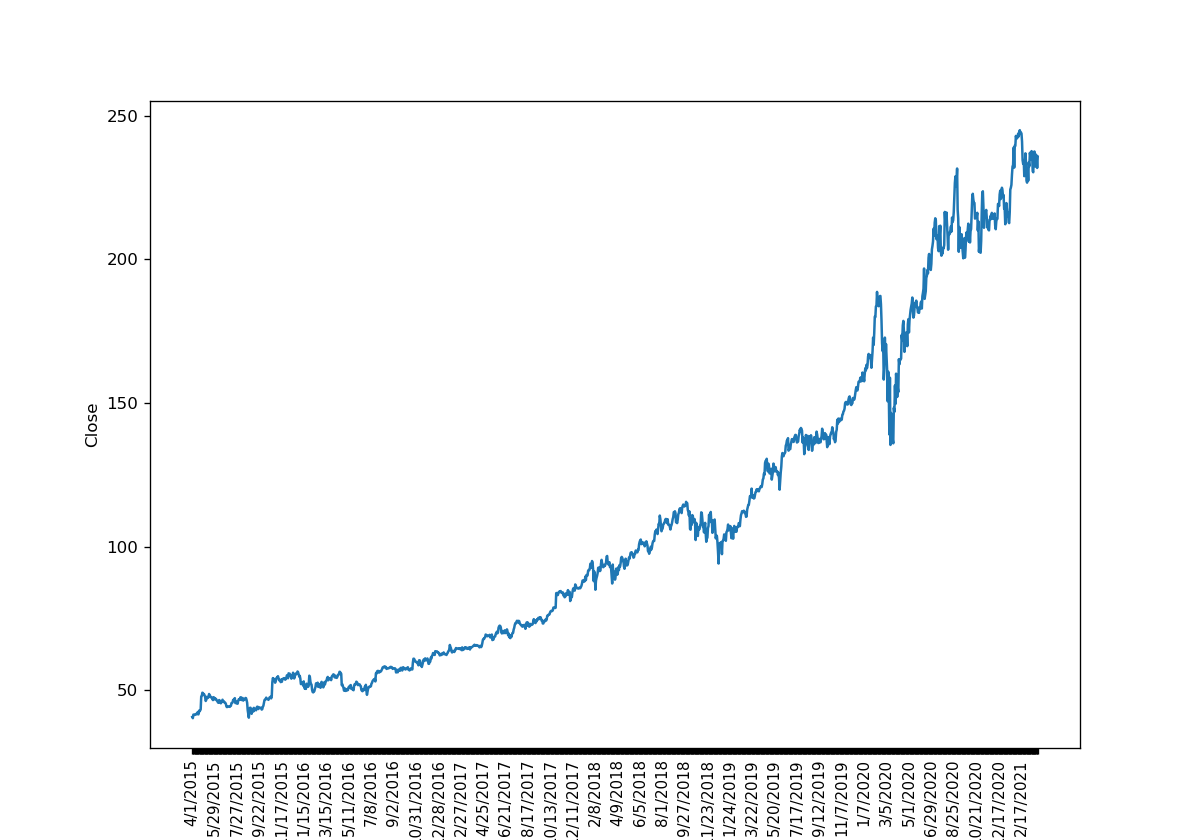

In [30]:
plt.rcParams.update({'figure.figsize':(10,7), 'figure.dpi':120})
fig, ax = plt.subplots()
ax.plot(times,series)

every_nth = 40
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
ax.set_xlabel('Time')
ax.set_ylabel('Close')
plt.xticks(fontsize=9 , rotation='vertical')
plt.show();
plt.savefig('series.png')

# Check (Non)stationary

1-adfuller test  
2-KPSS test

## ADFuller Test  
H0= Nonstationarity

### Test on original series

In [8]:
from statsmodels.tsa.stattools import adfuller

In [9]:
# ADF Test
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, p= {value}')

ADF Statistic: 1.7371362899270992
n_lags: 0.9982158366942122
p-value: 0.9982158366942122
Critial Values:
   1%, p= -3.4347582315402434
Critial Values:
   5%, p= -2.863486949792871
Critial Values:
   10%, p= -2.567806534528638


### Test on series.diff

In [10]:
result=adfuller(series.diff().dropna(),autolag='AIC')
print(f'p value is ={result[1]}')
for k , v in result[4].items():
    print('Critical values:')
    print(k , v)

p value is =1.5195939917527893e-17
Critical values:
1% -3.43476120520139
Critical values:
5% -2.863488262178673
Critical values:
10% -2.567807233388883


## KPSS test


In [11]:
import statsmodels.api as sm
sm.tsa.stattools.kpss(series,regression='ct')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


(1.2451608197166324,
 0.01,
 25,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

# Correlation of series with it's lags

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

**Note that if we don't dropna after differencing the series we would get no Autocorrelation in output withou any error**

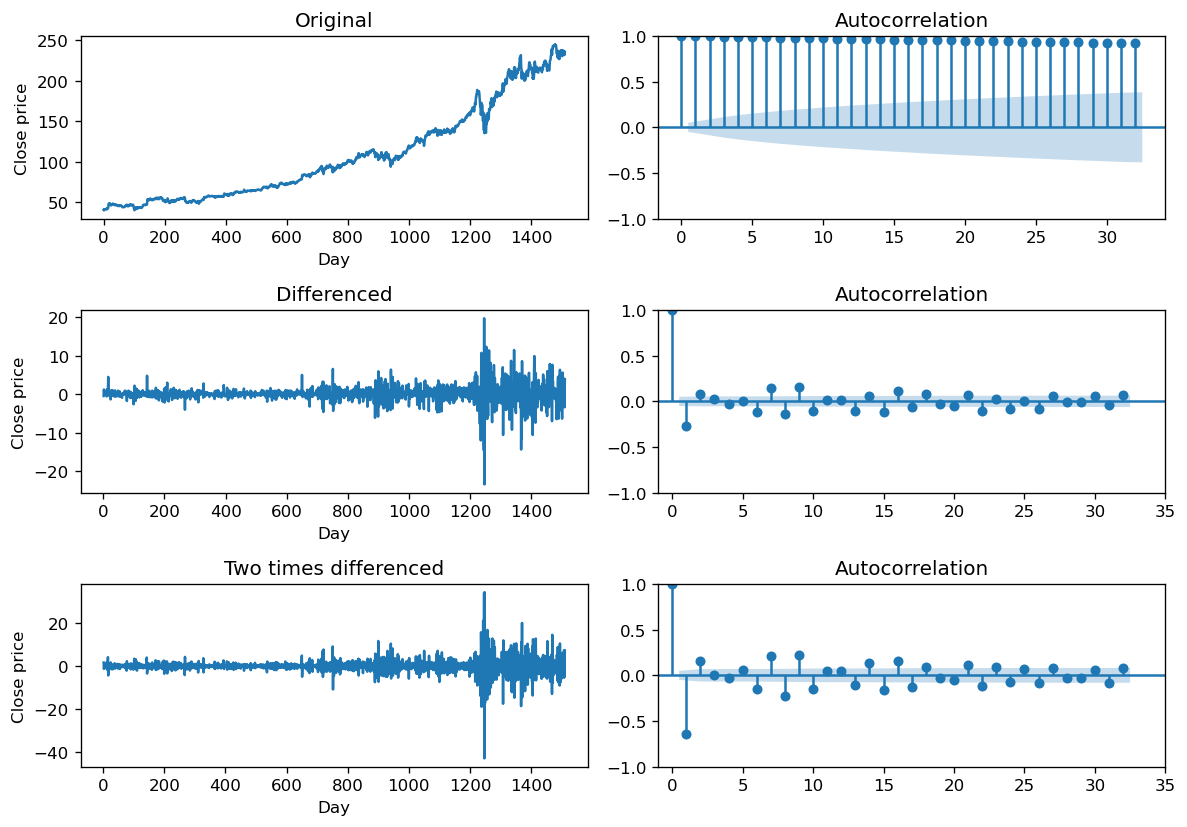

In [68]:
plt.rcParams.update({'figure.figsize':(10,7), 'figure.dpi':120})
fig , axes=plt.subplots(3,2)

axes[0,0].plot(series)
axes[0,0].set_title('Original')
axes[0,0].set_xlabel('Day')
axes[0,0].set_ylabel('Close price')

plot_acf(series, ax=axes[0,1])

axes[1,0].plot(series.diff().dropna())
axes[1,0].set_title('Differenced')
plot_acf(series.diff().dropna(), ax=axes[1,1])
axes[1,1].set_xlim([-1, 35])
axes[1,0].set_xlabel('Day')
axes[1,0].set_ylabel('Close price')

axes[2,0].plot(series.diff().diff().dropna())
axes[2,0].set_title('Two times differenced')
plot_acf(series.diff().diff().dropna(), ax=axes[2,1])
axes[2,1].set_xlim([-1, 35])
axes[2,0].set_xlabel('Day')
axes[2,0].set_ylabel('Close price')

plt.tight_layout()
plt.show()

# Partial Correlation of series with it's lags

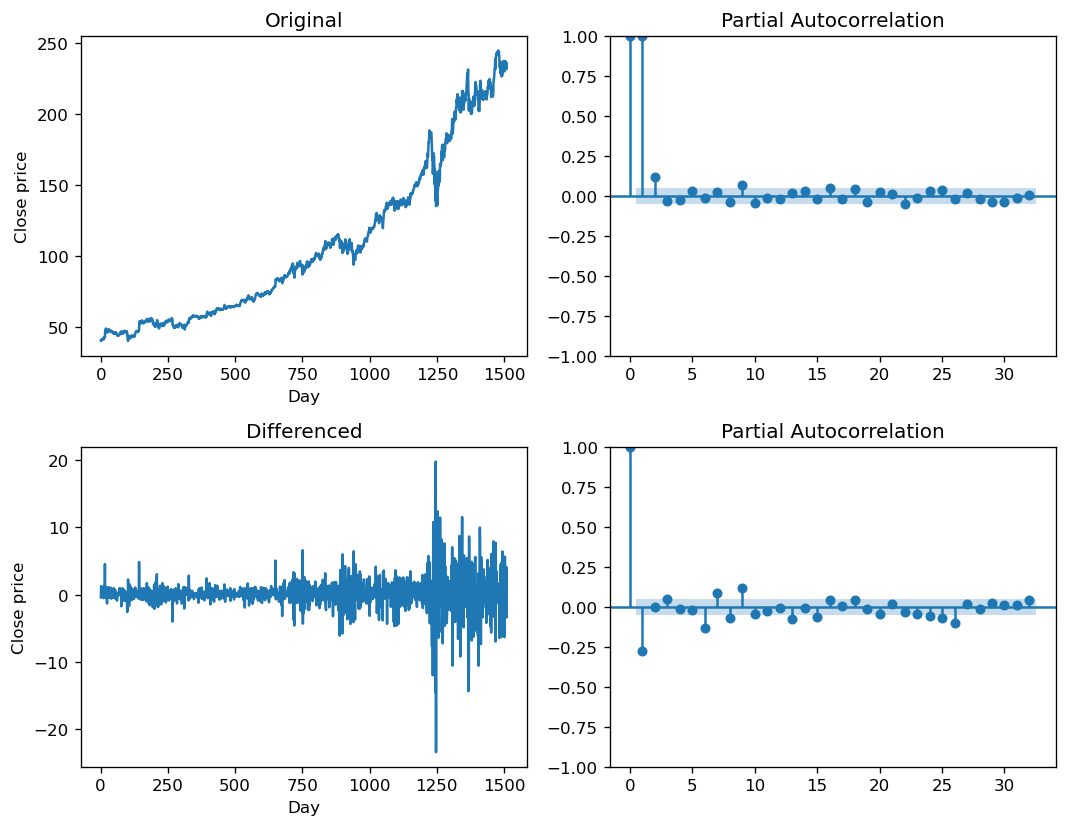

In [70]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
fig , axes=plt.subplots(2,2)

axes[0,0].plot(series)
axes[0,0].set_title('Original')
plot_pacf(series, ax=axes[0,1])
axes[0,0].set_xlabel('Day')
axes[0,0].set_ylabel('Close price')

axes[1,0].plot(series.diff().dropna())
axes[1,0].set_title('Differenced')
plot_pacf(series.diff().dropna(), ax=axes[1,1])
axes[1,0].set_xlabel('Day')
axes[1,0].set_ylabel('Close price')
plt.tight_layout()
plt.show()

# Usefull commands for defining the order of diff 

In [15]:
from pmdarima.arima.utils import ndiffs
ndiffs(series, test='adf')

1

In [16]:
ndiffs(series, test='kpss')

1

In [17]:
ndiffs(series, test='pp')

1

# Testing MA and AR on the series

## MA for q=5

In [18]:
q=5

def MA(i,series,q):
    summ=0
    for j in range(q):
        summ+=series[i-j]
    mean=summ/q
    return mean
y_pred=[]
y_true=[]
for i in range(q,len(series)):
    y_pred.append(MA(i,series,q))
    y_true.append(series[i])

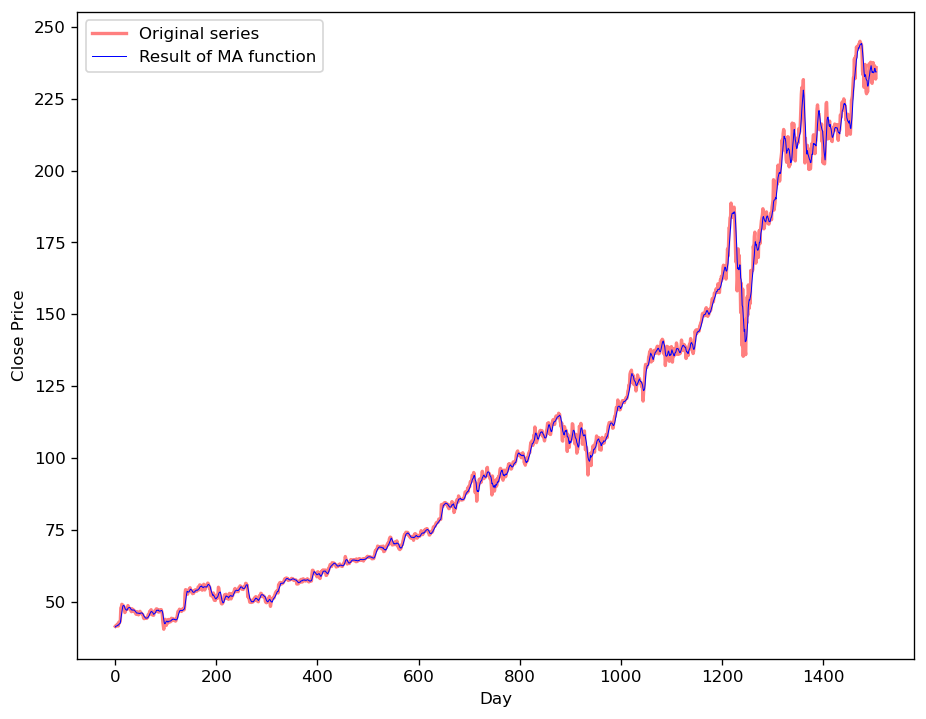

In [19]:
plt.plot(y_true,'r-',linewidth=2,alpha=.5,label='Original series')
plt.plot(y_pred,'b-',linewidth=.6,label='Result of MA function')
plt.xlabel('Day')
plt.ylabel('Close Price')
plt.legend()


# Auto Regressive Model   
80% of series is for fitting the AR model.  
20% of series is for testing the model.

## Auto Regressive for original series with p=2

In [8]:
from statsmodels.tsa.ar_model import AutoReg

In [9]:
train_set=series.iloc[:int(len(series)*.8)]
test_set=series.iloc[int(len(series)*.8):]

In [10]:
p=2
model=AutoReg(train_set,p).fit()

In [11]:
start=int(len(series)*.8)
end=int(len(series))

In [12]:
y_pred=model.predict(start=start-600,end=end)
y_true=series.copy()

In [13]:
conf_interval_pred=model.get_prediction(start=start, end=end)

In [14]:
upper_limit=conf_interval_pred.conf_int(.95)['upper']
lower_limit=conf_interval_pred.conf_int(.95)['lower']

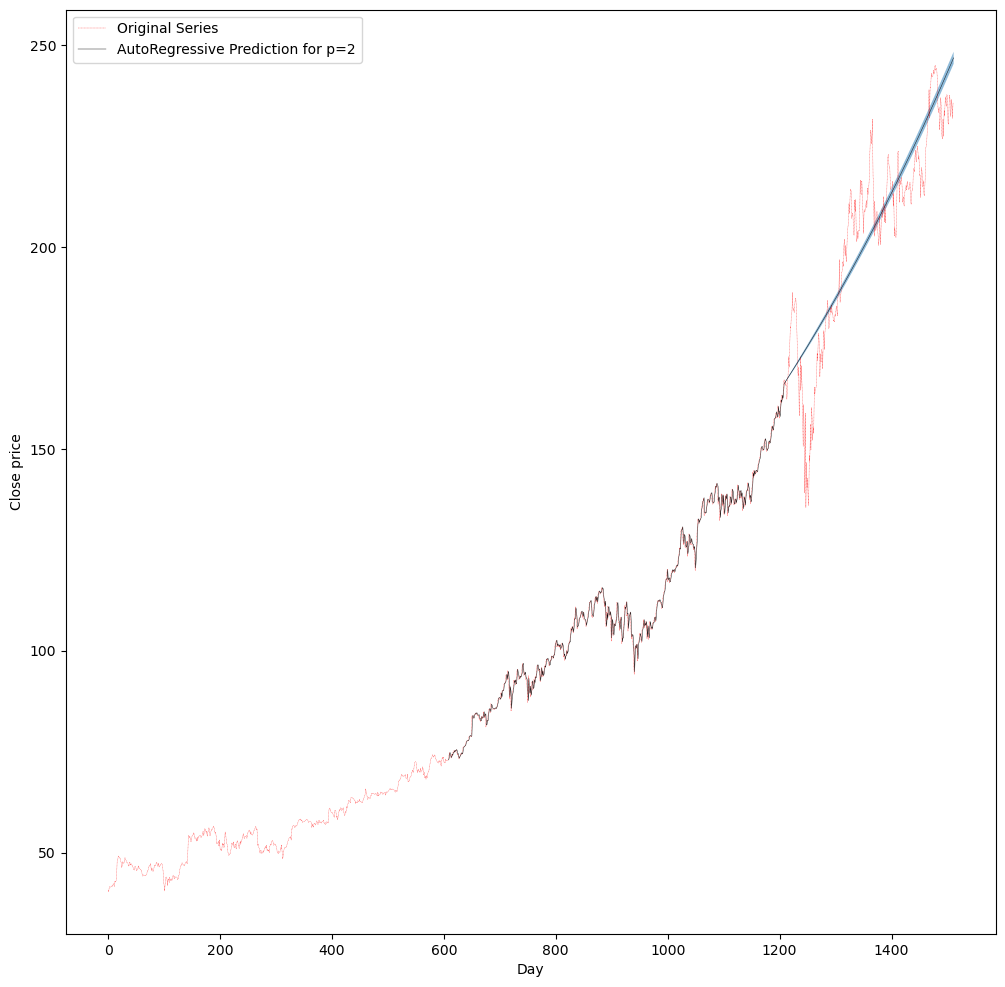

In [15]:
plt.figure(figsize=(12,12))
plt.fill_between(lower_limit.index,lower_limit,upper_limit,alpha=.5)
plt.plot(y_true,'r--',linewidth=.2,label='Original Series')
plt.plot(y_pred,'k-',linewidth=.3,label='AutoRegressive Prediction for p=2')
plt.xlabel('Day')
plt.ylabel('Close price')
plt.legend(loc='upper left')

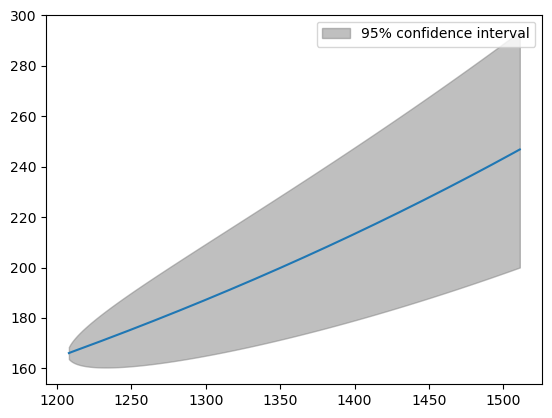

In [16]:
model.plot_predict(start=start,end=end);

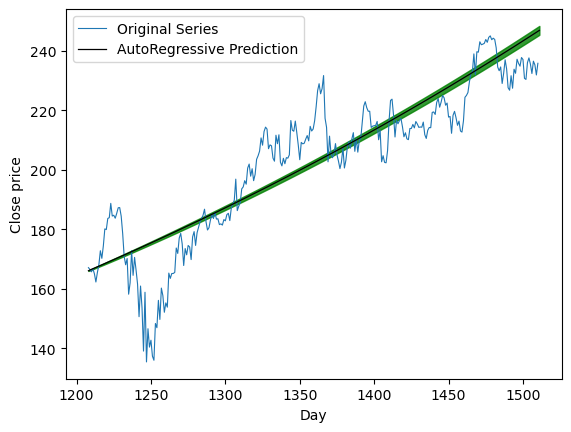

In [17]:
pred=model.predict(start=start,end=end)
plt.fill_between(lower_limit.index,lower_limit,upper_limit,alpha=.8,color='green')
plt.plot(test_set,linewidth=.8,label='Original Series')
plt.plot(pred,'k-',linewidth=.9,label='AutoRegressive Prediction')
plt.xlabel('Day')
plt.ylabel('Close price')
plt.legend(loc='upper left')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


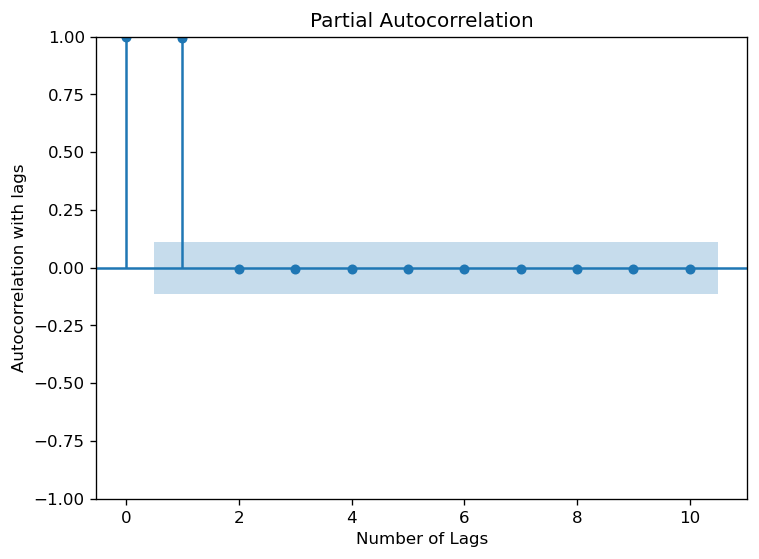

In [30]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':120})
plot_pacf(pred,lags=10);
plt.xlabel('Number of Lags')
plt.ylabel('Autocorrelation with lags')
plt.show();

## Auto Regressive Model for one order differencing
80% of series  is predicted using AR

In [31]:
model=AutoReg(train_set.diff().dropna(),p).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [32]:
start=int(len(series.diff().dropna())*.8)
end=int(len(series.diff().dropna()))

In [33]:
y_pred=model.predict(start=start-600,end=end)
y_true=test_set.diff().dropna().copy()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


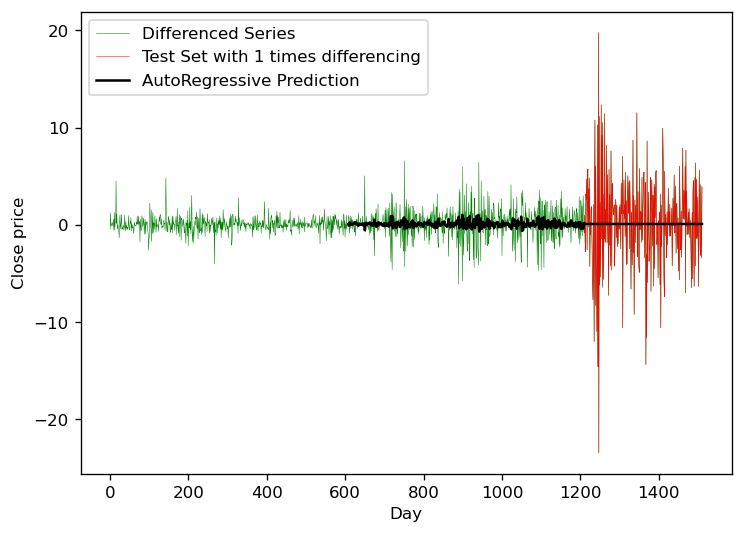

In [34]:
plt.plot(series.diff().dropna(), 'g-',linewidth=.3,label='Differenced Series')
plt.plot(y_true,'r-',linewidth=.3,label='Test Set with 1 times differencing')
plt.plot(y_pred,'k-',label='AutoRegressive Prediction')
plt.legend(loc='upper left')
plt.xlabel('Day')
plt.ylabel('Close price')
plt.legend(loc='upper left')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


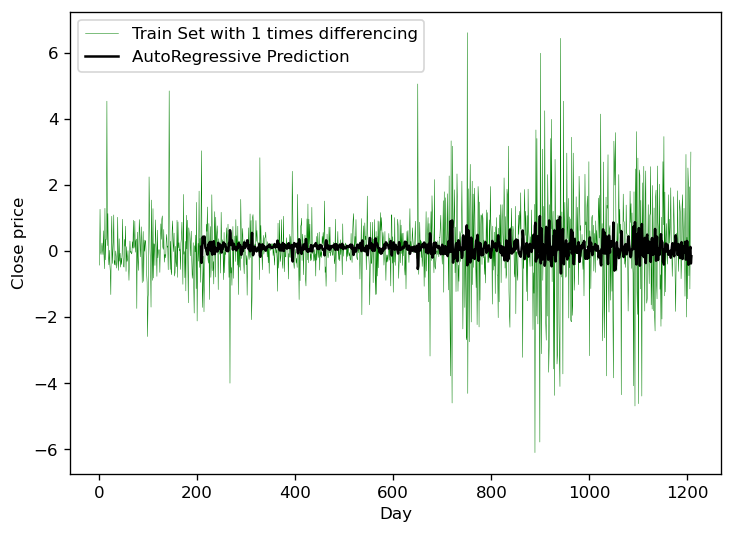

In [35]:
y_pred=model.predict(start=start-1000,end=start)
plt.plot(series.diff().iloc[:start], 'g-',linewidth=.3,label='Train Set with 1 times differencing')

plt.plot(y_pred,'k-',label='AutoRegressive Prediction')
plt.xlabel('Day')
plt.ylabel('Close price')
plt.legend(loc='upper left')

## Auto Regressive Model two order differencing
80% of series  is predicted using AR

In [36]:
model=AutoReg(train_set.diff().diff().dropna(),p).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [37]:
start=int(len(series.diff().diff().dropna())*.8)
end=int(len(series.diff().diff().dropna()))

In [38]:
y_pred=model.predict(start=start,end=end)
y_true=series.diff().diff().dropna().copy()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


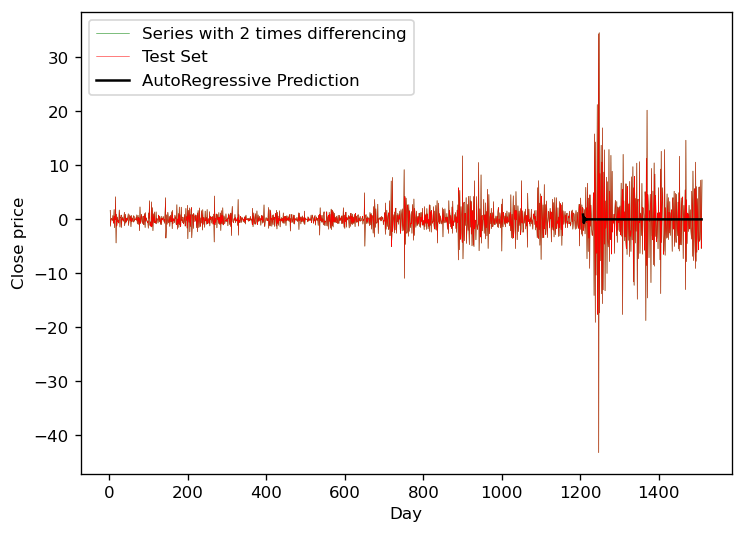

In [39]:
plt.plot(series.diff().diff().dropna(), 'g-',linewidth=.3,label='Series with 2 times differencing')
plt.plot(y_true,'r-',linewidth=.3,label='Test Set')
plt.plot(y_pred,'k-',label='AutoRegressive Prediction')
plt.legend(loc='upper left')
plt.xlabel('Day')
plt.ylabel('Close price')
plt.legend(loc='upper left')


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


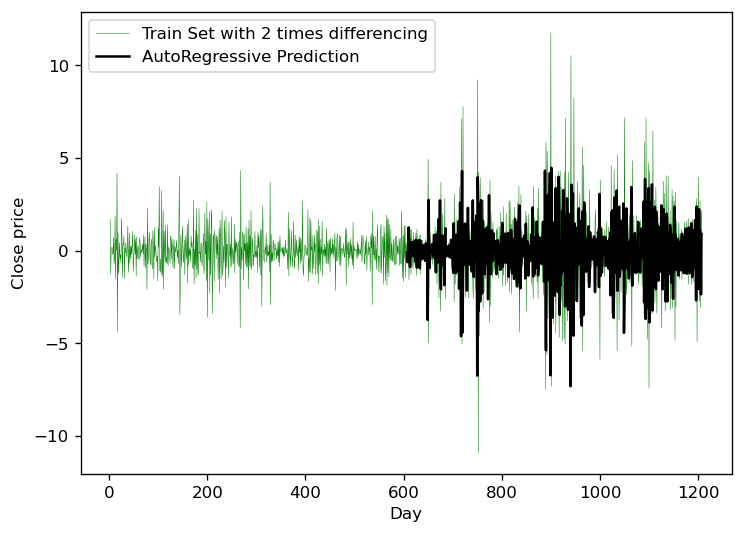

In [40]:
y_pred=model.predict(start=start-600,end=start)
plt.plot(series.diff().diff().dropna().iloc[:start], 'g-',linewidth=.3,label='Train Set with 2 times differencing')

plt.plot(y_pred,'k-',label='AutoRegressive Prediction')
plt.xlabel('Day')
plt.ylabel('Close price')
plt.legend(loc='upper left')

## Search for the order of AR 

## AR(1)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


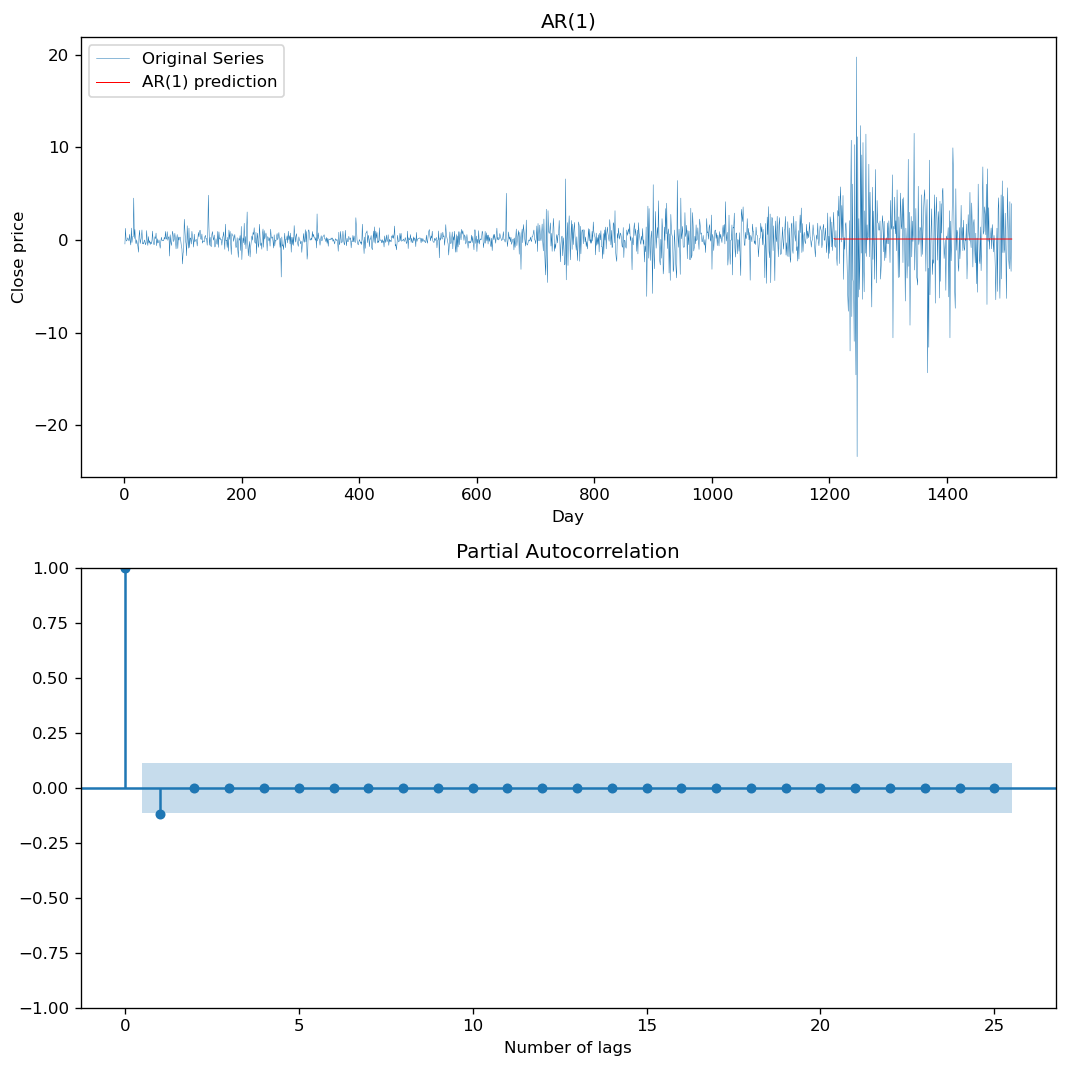

In [41]:
p=1
model=AutoReg(train_set.diff().dropna(),p).fit()

start=int(len(series.diff().dropna())*.8)
end=int(len(series.diff().dropna()))

y_pred=model.predict(start=start,end=end)
y_true=series.diff().dropna().copy()


plt.rcParams.update({'figure.figsize':(9,9), 'figure.dpi':120});
fig , axes=plt.subplots(2,1);

axes[0].plot(y_true,linewidth=.3,label='Original Series');
axes[0].plot(y_pred,'r-',linewidth=.6,label='AR(1) prediction')
axes[0].set_title(f'AR({p})');
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Close price')
axes[0].legend(loc='upper left')

plot_pacf(y_pred, ax=axes[1]);
axes[1].set_xlabel('Number of lags')
plt.tight_layout()
plt.show();

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


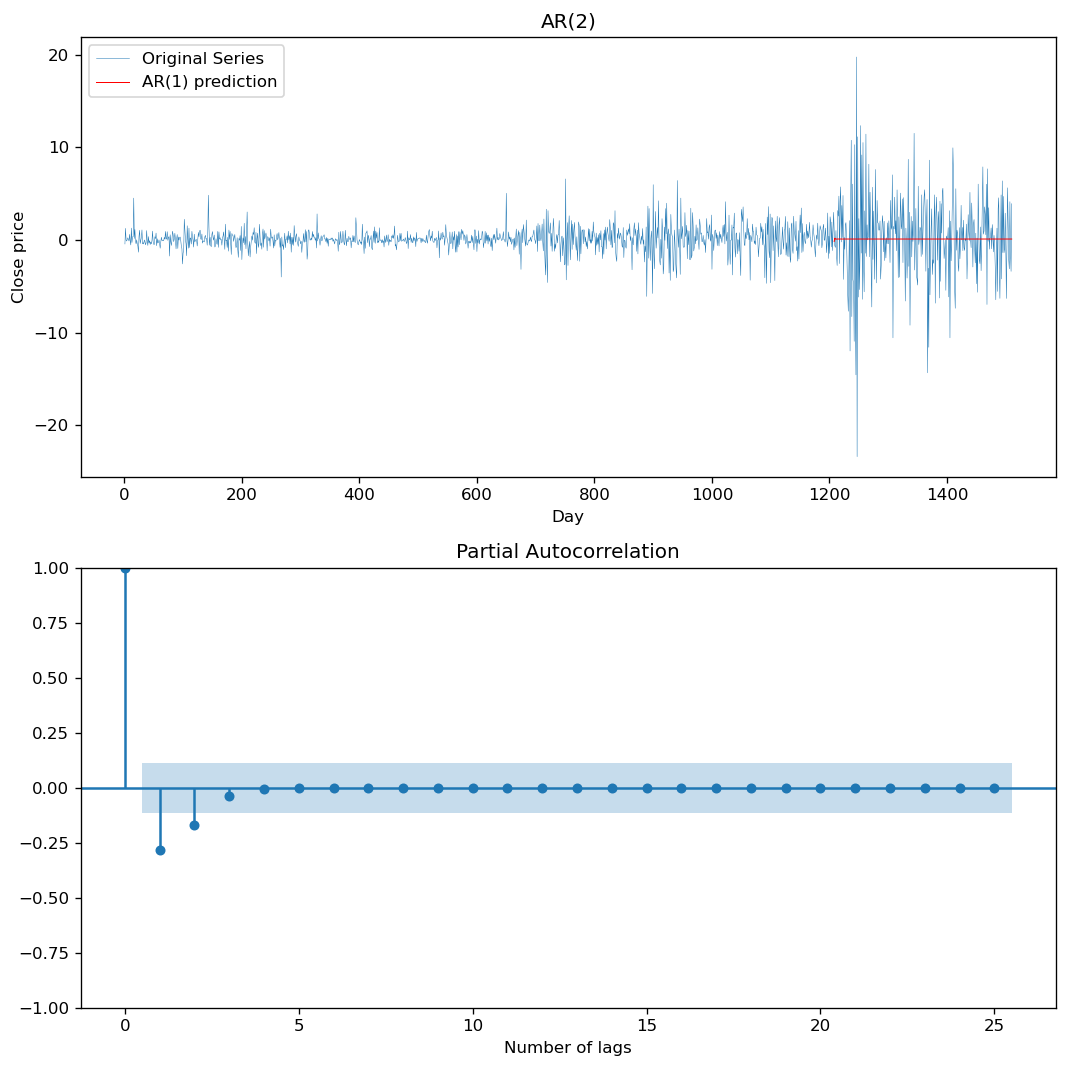

In [42]:
p=2
model=AutoReg(train_set.diff().dropna(),p).fit()

start=int(len(series.diff().dropna())*.8)
end=int(len(series.diff().dropna()))

y_pred=model.predict(start=start,end=end)
y_true=series.diff().dropna().copy()


plt.rcParams.update({'figure.figsize':(9,9), 'figure.dpi':120});
fig , axes=plt.subplots(2,1);

axes[0].plot(y_true,linewidth=.3,label='Original Series');
axes[0].plot(y_pred,'r-',linewidth=.6,label='AR(1) prediction')
axes[0].set_title(f'AR({p})');
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Close price')
axes[0].legend(loc='upper left')

plot_pacf(y_pred, ax=axes[1]);
axes[1].set_xlabel('Number of lags')
plt.tight_layout()
plt.show();

# Seasonality test

In [43]:
from pmdarima.arima import nsdiffs
nsdiffs(series,m=7)

0

In [44]:
nsdiffs(series,m=12)

0

In [42]:
nsdiffs(series,m=52)

0

# Decomposition 

## seasonal_decompose

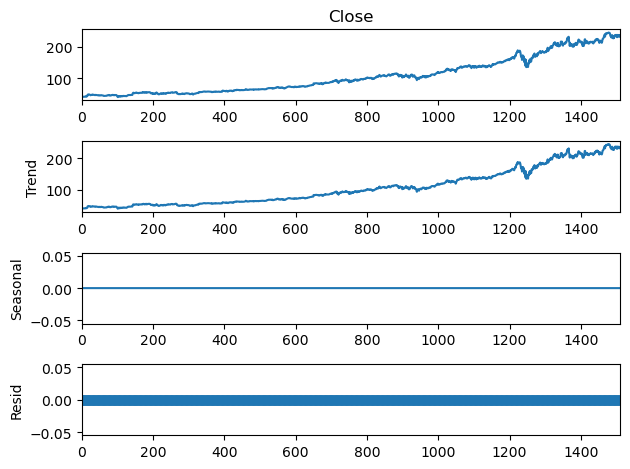

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

series=df.Close
result = seasonal_decompose(series, model='additive',period=1,)
result.plot()
plt.show()


## MSTL

In [9]:
from statsmodels.tsa.seasonal import MSTL

ImportError: cannot import name 'MSTL' from 'statsmodels.tsa.seasonal' (C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\seasonal.py)

# ARIMA Model

## Grid search for p,q

In [44]:
from sklearn.metrics import mean_squared_error

In [45]:
from statsmodels.tsa.arima.model import ARIMA

In [46]:
def arima_search(p,q):
    
    start=int(len(series.diff().dropna())*.8)
    end=int(len(series.diff().dropna()))
    
    train_set=series.iloc[:int(len(series)*.8)]
    test_set=series.iloc[int(len(series)*.8):]
    model=ARIMA(train_set,order=(p,1,q)).fit()
    y_pred=model.predict(start=start,end=end)


    # calculate out of sample error
    mse_error = mean_squared_error(y_pred, test_set)
    
    return print(f'mse = {mse_error} ') 

In [47]:
arima_search(1,1)

mse = 1994.3206766200954 


In [229]:
for p in range(0,4):
    for q in range (0,4):
#         print('-------------------')
        print(f'for p = {p} , q = {q}')
        print(arima_search(p,q))
        print('-------------------')

for p = 0 , q = 0
mse = 1930.5732884488455 
None
-------------------
for p = 0 , q = 1
mse = 1960.2235081665922 
None
-------------------
for p = 0 , q = 2
mse = 1982.7069035560248 
None
-------------------
for p = 0 , q = 3
mse = 1970.6212939600243 
None
-------------------
for p = 1 , q = 0
mse = 1951.7825196415558 
None
-------------------
for p = 1 , q = 1
mse = 1994.3206766200954 
None
-------------------
for p = 1 , q = 2
mse = 1973.733288860403 
None
-------------------
for p = 1 , q = 3
mse = 1976.8217056407186 
None
-------------------
for p = 2 , q = 0
mse = 1976.6907520597706 
None
-------------------
for p = 2 , q = 1
mse = 1973.1262538705441 
None
-------------------
for p = 2 , q = 2
mse = 1952.8203852833155 
None
-------------------
for p = 2 , q = 3
mse = 1961.497348730644 
None
-------------------
for p = 3 , q = 0
mse = 1968.0844294281937 
None
-------------------
for p = 3 , q = 1
mse = 1970.6485231655631 
None
-------------------
for p = 3 , q = 2


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


mse = 2007.6101695234186 
None
-------------------
for p = 3 , q = 3
mse = 2010.9105162244357 
None
-------------------


## Auto ARIMA

In [53]:
from pmdarima.arima import auto_arima

In [54]:
start=int(len(series.diff().dropna())*.8)
end=int(len(series.diff().dropna()))

train_set=series.iloc[:int(len(series)*.8)]
test_set=series.iloc[int(len(series)*.8):]
Arima_model=auto_arima(series, start_p=1, start_q=1, max_p=3, max_q=3, seasonal=False, trace=True,  error_action='warn', suppress_warnings=True, random_state = 20, n_fits=30,out_of_sample_size=len(test_set))

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6762.380, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6876.786, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6760.385, Time=0.25 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6770.738, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6879.320, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6762.379, Time=0.35 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6747.571, Time=1.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=6743.846, Time=1.21 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=6760.906, Time=0.44 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=6747.235, Time=1.58 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6761.238, Time=1.70 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=6749.122, Time=0.65 sec

Best model:  ARIMA(3,1,1)(0,0,0)[0] intercept
Total fit time: 8.213 seconds


## Model summary for least mse: p=3,q=1

In [49]:
model = ARIMA(train_set, order=(3,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1208
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -1961.410
Date:                Mon, 05 Dec 2022   AIC                           3932.820
Time:                        08:16:19   BIC                           3958.300
Sample:                             0   HQIC                          3942.416
                               - 1208                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3629      0.383     -0.947      0.344      -1.114       0.388
ar.L2         -0.1275      0.053     -2.402      0.016      -0.232      -0.023
ar.L3          0.0247      0.050      0.491      0.6

## Plot residuals

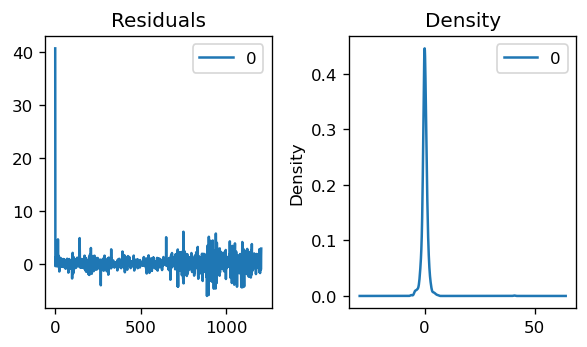

In [142]:
plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':120})

residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.tight_layout()
plt.show()


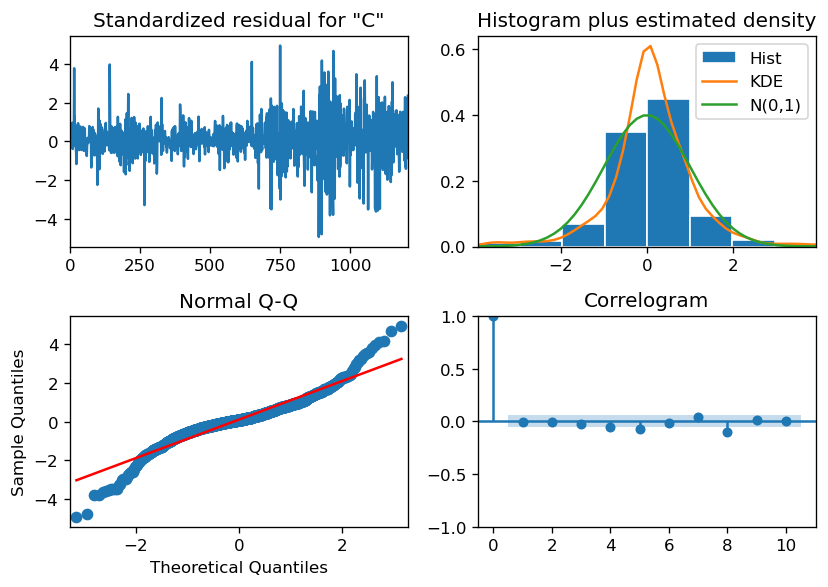

In [143]:
model_fit.plot_diagnostics(figsize=(7,5))
plt.tight_layout()
plt.show()


## Comparing the result of ARIMA with p=3 , d=0 , q=0 and AR with p=2

In [8]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

### When we consider whole the series

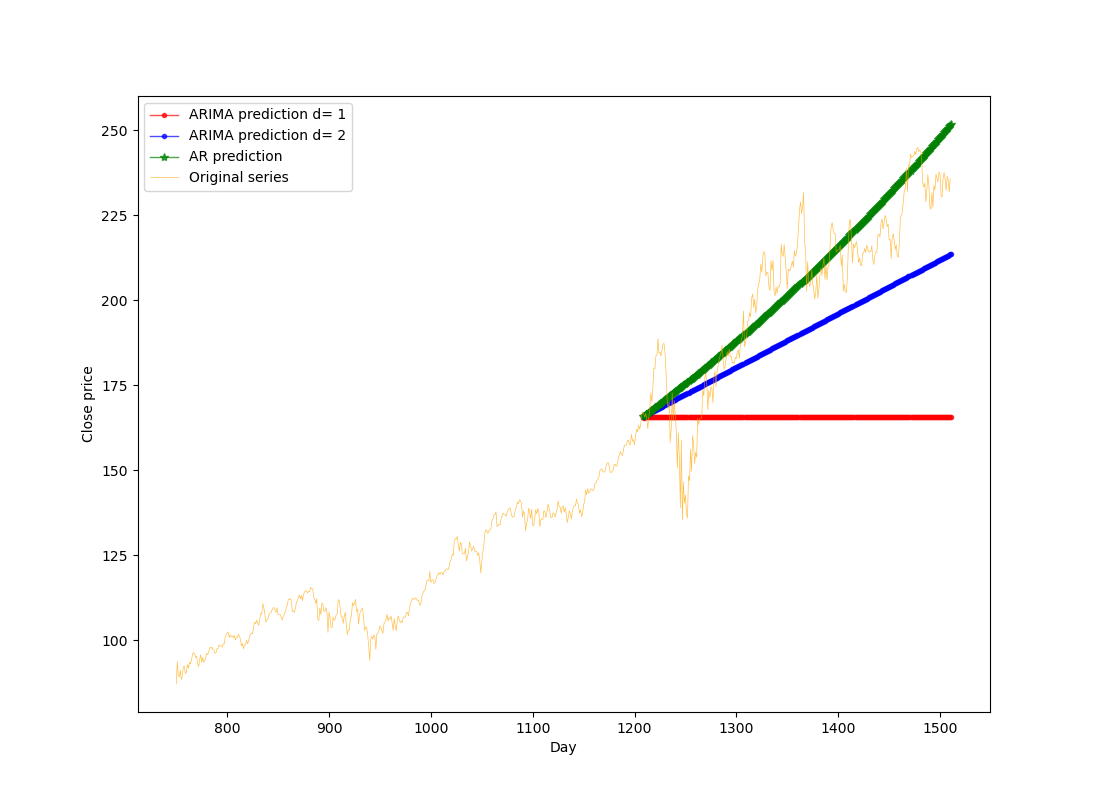

In [18]:
n_portion=.8
p=3
q=1
d=1

start=int(len(series)*n_portion)
end=int(len(series))


train_set=series.iloc[:int(len(series)*n_portion)]
test_set=series.iloc[int(len(series)*n_portion):]




def arima_d(d,series=series):
    train_set=series.iloc[:int(len(series)*n_portion)]
    test_set=series.iloc[int(len(series)*n_portion):]
    start=int(len(series)*n_portion)
    end=int(len(series))
    model_ARIMA=ARIMA(train_set,order=(p,d,q)).fit()
    
    return model_ARIMA.predict(start=start,end=end)

y_pred_ARIMA_1 = arima_d(1)
y_pred_ARIMA_2 = arima_d(2)

series=df['Close']
train_set=series.iloc[:int(len(series)*n_portion)]
test_set=series.iloc[int(len(series)*n_portion):]
start=int(len(series)*n_portion)
end=int(len(series))

model_AR=AutoReg(train_set,p).fit()
y_pred_AR=model_AR.predict(start=start,end=end)
y_true = series.copy()
alpha=.7
plt.figure(figsize=(11,8))
plt.plot(y_pred_ARIMA_1,'.-',label='ARIMA prediction d= 1',linewidth=1,color='red',alpha=alpha)
plt.plot(y_pred_ARIMA_2,'.-',label='ARIMA prediction d= 2',linewidth=1,color='blue',alpha=alpha)

plt.plot(y_pred_AR,'*-',label='AR prediction',color='green',linewidth=1,alpha=alpha)
plt.plot(y_true[750:],label='Original series',color='orange',linewidth=.5,alpha=alpha)
plt.xlabel('Day')
plt.ylabel('Close price')
plt.legend(loc='upper left')

plt.savefig('AR_ARIMA1_ARIMA_2.png')

### When we consider 80% of series :

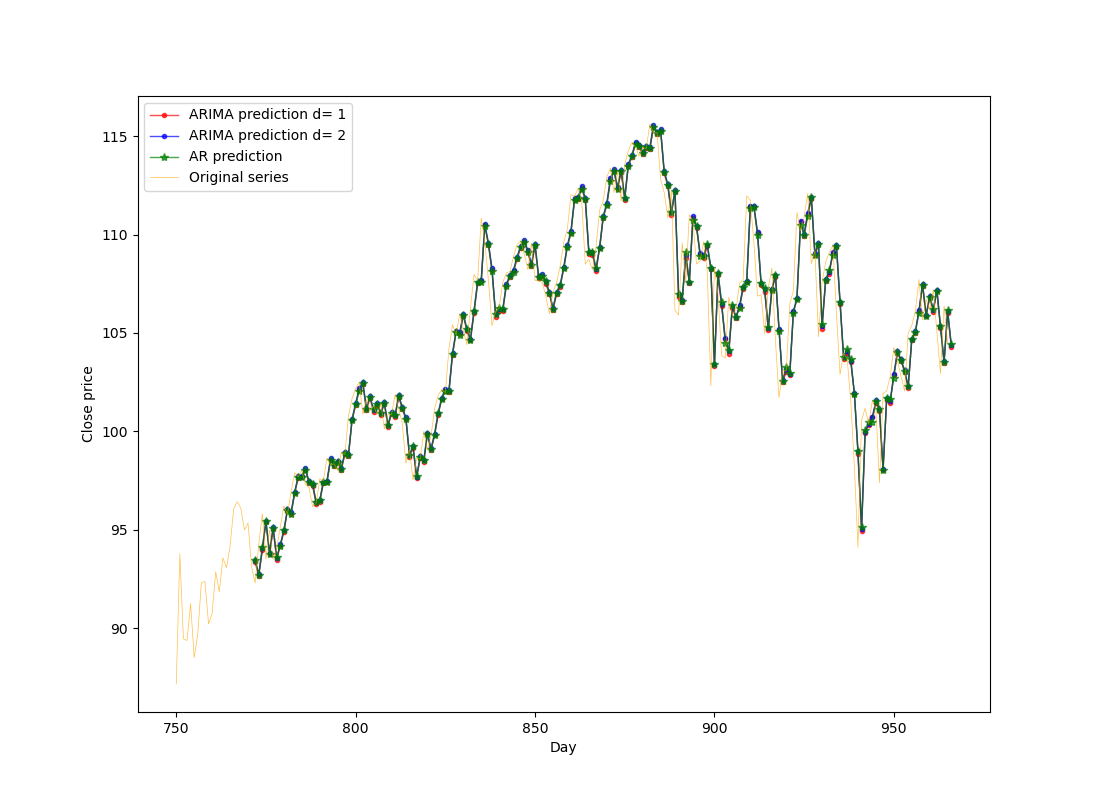

In [17]:
n_portion=.8
p=3
q=1
d=1

start=int(len(series)*n_portion)
end=int(len(series))


train_set=series.iloc[:int(len(series)*n_portion)]
test_set=series.iloc[int(len(series)*n_portion):]




def arima_d(d,series=series):
    train_set=series.iloc[:int(len(series)*n_portion)]
    train_set=train_set.iloc[:int(len(train_set)*n_portion)]
    test_set=train_set.iloc[int(len(train_set)*n_portion):]
    start=int(len(train_set)*n_portion)
    end=int(len(train_set))
    model_ARIMA=ARIMA(train_set,order=(p,d,q)).fit()
    
    return model_ARIMA.predict(start=start,end=end)

y_pred_ARIMA_1 = arima_d(1)
y_pred_ARIMA_2 = arima_d(2)


train_set=series.iloc[:int(len(series)*n_portion)]
train_set=train_set.iloc[:int(len(train_set)*n_portion)]
test_set=train_set.iloc[int(len(train_set)*n_portion):]
start=int(len(train_set)*n_portion)
end=int(len(train_set))

model_AR=AutoReg(train_set,p).fit()
y_pred_AR=model_AR.predict(start=start,end=end)
y_true = train_set.copy()
alpha=.7
plt.figure(figsize=(11,8))
plt.plot(y_pred_ARIMA_1,'.-',label='ARIMA prediction d= 1',linewidth=1,color='red',alpha=alpha)
plt.plot(y_pred_ARIMA_2,'.-',label='ARIMA prediction d= 2',linewidth=1,color='blue',alpha=alpha)

plt.plot(y_pred_AR,'*-',label='AR prediction',color='green',linewidth=1,alpha=alpha)
plt.plot(y_true[750:],label='Original series',color='orange',linewidth=.5,alpha=alpha)
plt.xlabel('Day')
plt.ylabel('Close price')
plt.legend(loc='upper left')

plt.savefig('AR_ARIMA1_ARIMA_2.png')

## Comparing the result of ARIMA for test data with true values p=3 , d=2 , q=1

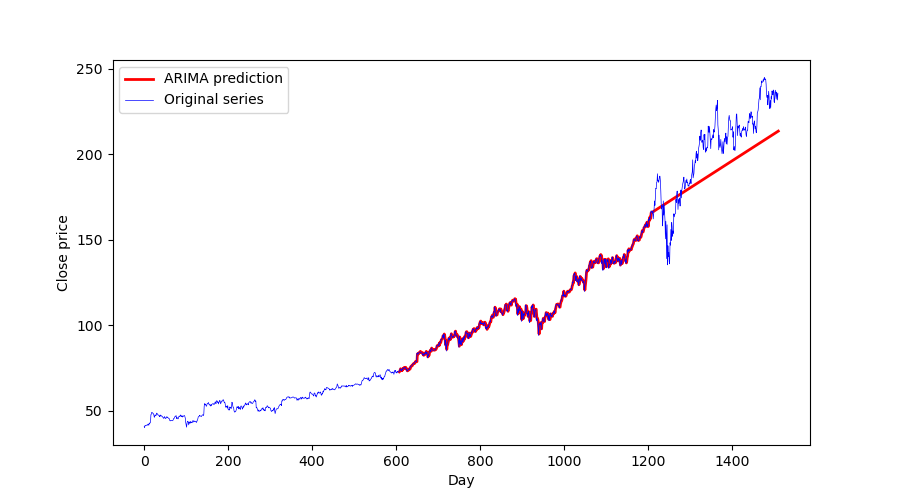

In [ ]:
n_portion=.8
p=3
q=1
d=2
start=int(len(series)*n_portion)
end=int(len(series))
train_set=series.iloc[:int(len(series)*n_portion)]
test_set=series.iloc[int(len(series)*n_portion):]

model=ARIMA(train_set,order=(p,d,q)).fit()
# model=AutoReg(train_set,p).fit()
y_pred = model.predict(start=start-600,end=end)
y_true = series.copy()
plt.figure(figsize=(9,5))
plt.plot(y_pred,'r-',label='ARIMA prediction',linewidth=2)
plt.plot(y_true,'b-',label='Original series',linewidth=.5)
plt.xlabel('Day')
plt.ylabel('Close price')
plt.legend(loc='upper left')

In [55]:
conf_interval_pred=model.get_prediction(start=start, end=end)

In [56]:
upper_limit=conf_interval_pred.conf_int(.95)['upper Close']
lower_limit=conf_interval_pred.conf_int(.95)['lower Close']

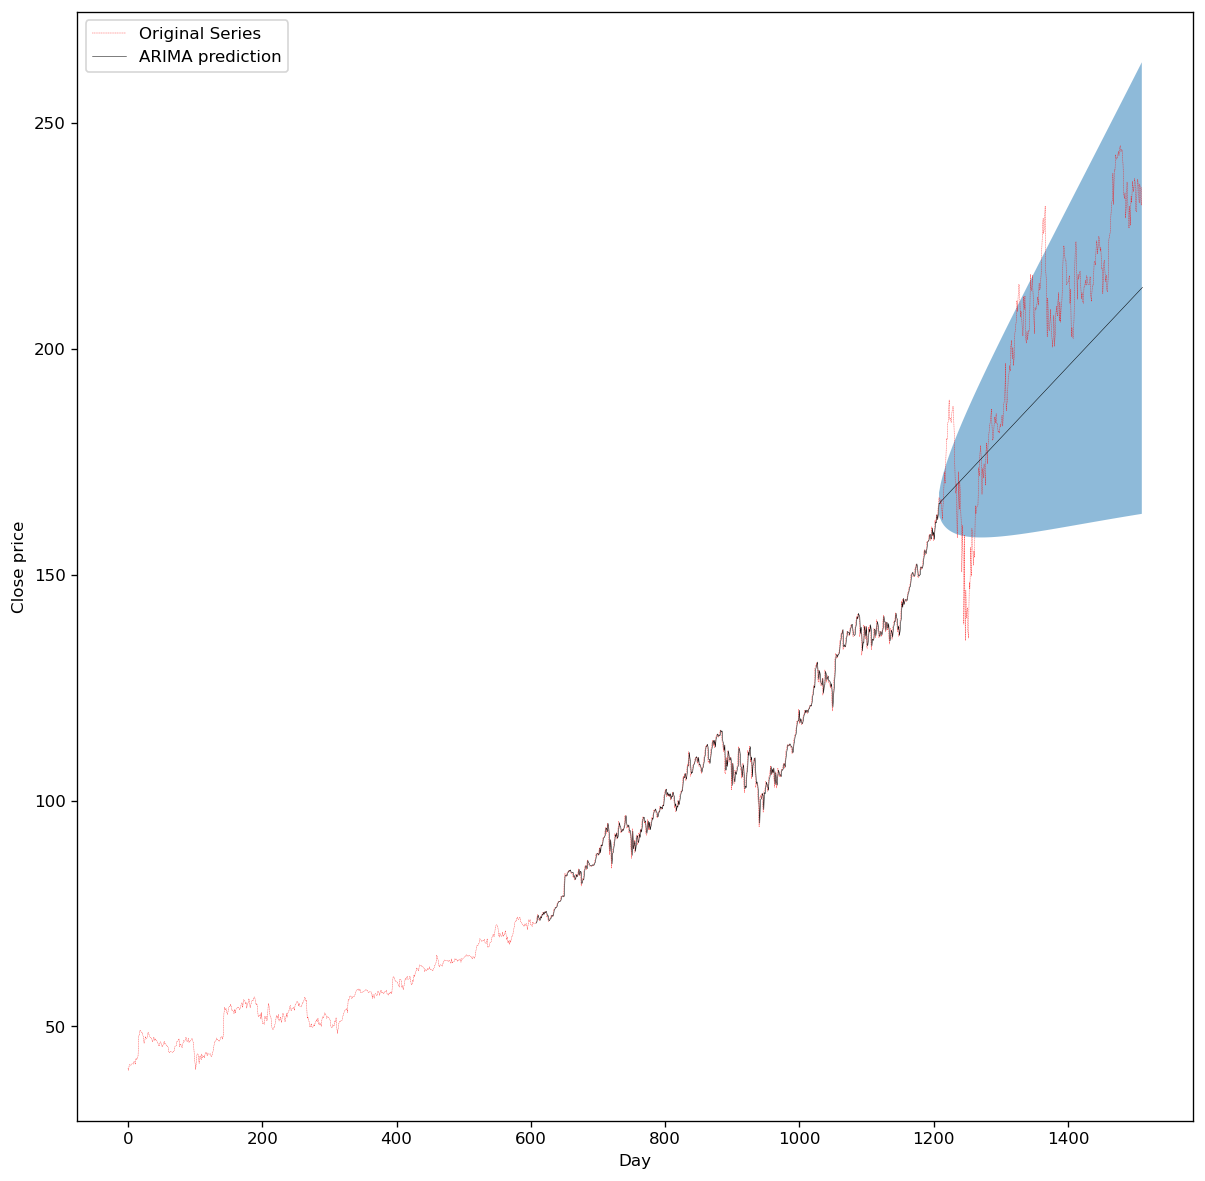

In [57]:
plt.figure(figsize=(12,12))
plt.fill_between(lower_limit.index,lower_limit,upper_limit,alpha=.5)
plt.plot(y_true,'r--',linewidth=.2,label='Original Series')
plt.plot(y_pred,'k-',linewidth=.3,label='ARIMA prediction')
plt.xlabel('Day')
plt.ylabel('Close price')
plt.legend(loc='upper left')

## Using the ARIMA to foracast (Extrapolating) p=3 , q=1 , d=2

In [61]:
n_portion=.9
p=3
q=1
d=2
start=int(len(series)*n_portion)
end=int(len(series))
train_set=series.iloc[:int(len(series)*n_portion)]
test_set=series.iloc[int(len(series)*n_portion):]

model=ARIMA(series,order=(p,d,q)).fit()



pred = model.get_forecast(15, alpha=0.05)

In [62]:
y_pred=pred.predicted_mean
conf_interval_pred=pred.conf_int(alpha=.05)

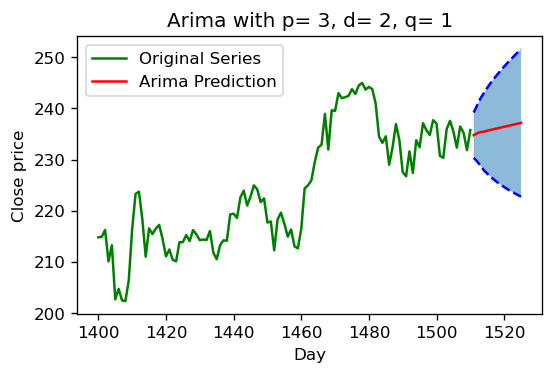

In [63]:
lower_limit=conf_interval_pred['lower Close']
upper_limit=conf_interval_pred['upper Close']


plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':120});
plt.plot(series[1400:],'g-',label='Original Series')
plt.plot(y_pred,'r-',label='Arima Prediction')
plt.plot(lower_limit,'b--')
plt.plot(upper_limit,'b--')
plt.fill_between(lower_limit.index,lower_limit,upper_limit,alpha=.5)
plt.xlabel('Day')
plt.ylabel('Close price')
plt.legend(loc='upper left')
plt.title(f'Arima with p= {p}, d= {d}, q= {q}')

plt.show();

# Series ACF for train set

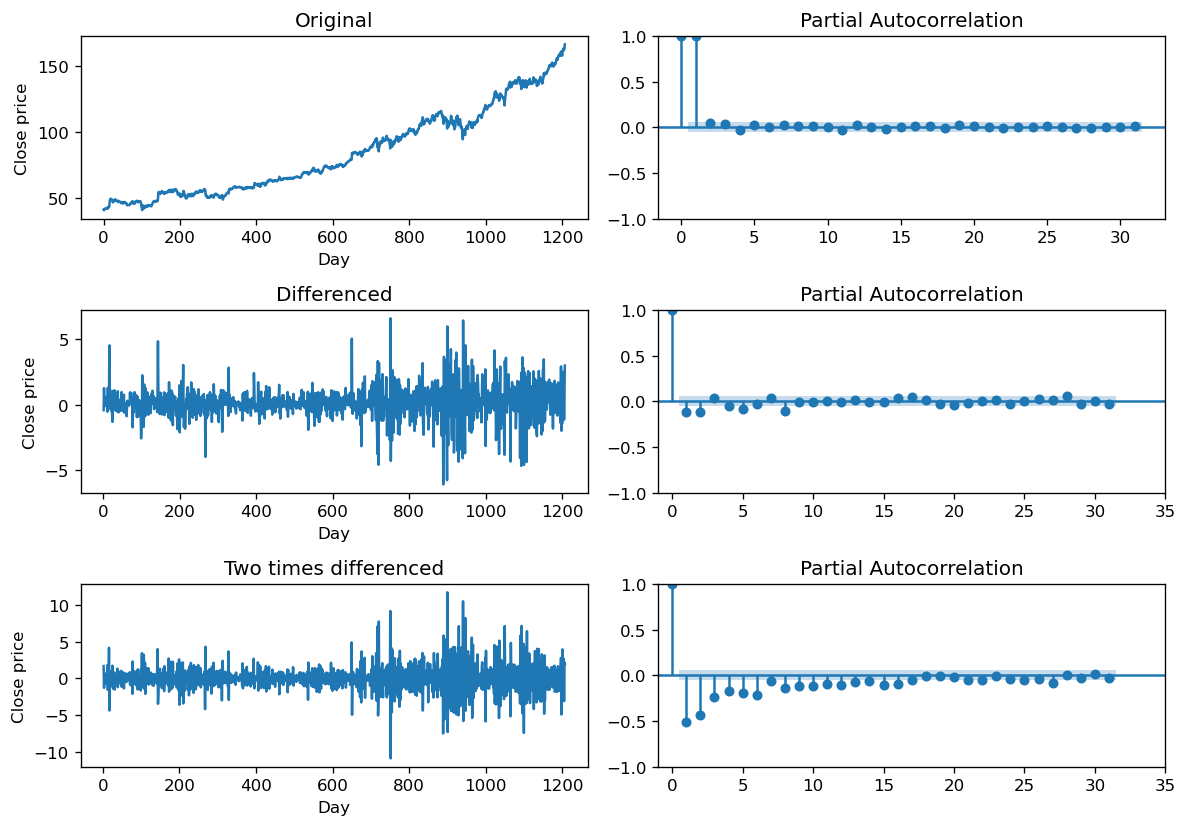

In [96]:
plt.rcParams.update({'figure.figsize':(10,7), 'figure.dpi':120})
fig , axes=plt.subplots(3,2)
series_train=pd.Series(train_set)
axes[0,0].plot(series_train)
axes[0,0].set_title('Original')
axes[0,0].set_xlabel('Day')
axes[0,0].set_ylabel('Close price')

plot_pacf(series_train, ax=axes[0,1])

axes[1,0].plot(series_train.diff().dropna())
axes[1,0].set_title('Differenced')
plot_pacf(series_train.diff().dropna(), ax=axes[1,1])
axes[1,1].set_xlim([-1, 35])
axes[1,0].set_xlabel('Day')
axes[1,0].set_ylabel('Close price')

axes[2,0].plot(series_train.diff().diff().dropna())
axes[2,0].set_title('Two times differenced')
plot_pacf(series_train.diff().diff().dropna(), ax=axes[2,1])
axes[2,1].set_xlim([-1, 35])
axes[2,0].set_xlabel('Day')
axes[2,0].set_ylabel('Close price')

plt.tight_layout()
plt.show()

# Series ACF for test set

In [89]:
n_portion=.8
p=3
q=1
d=2
start=int(len(series)*n_portion)
end=int(len(series))
train_set=series.iloc[:int(len(series)*n_portion)]
test_set=series.iloc[int(len(series)*n_portion):]

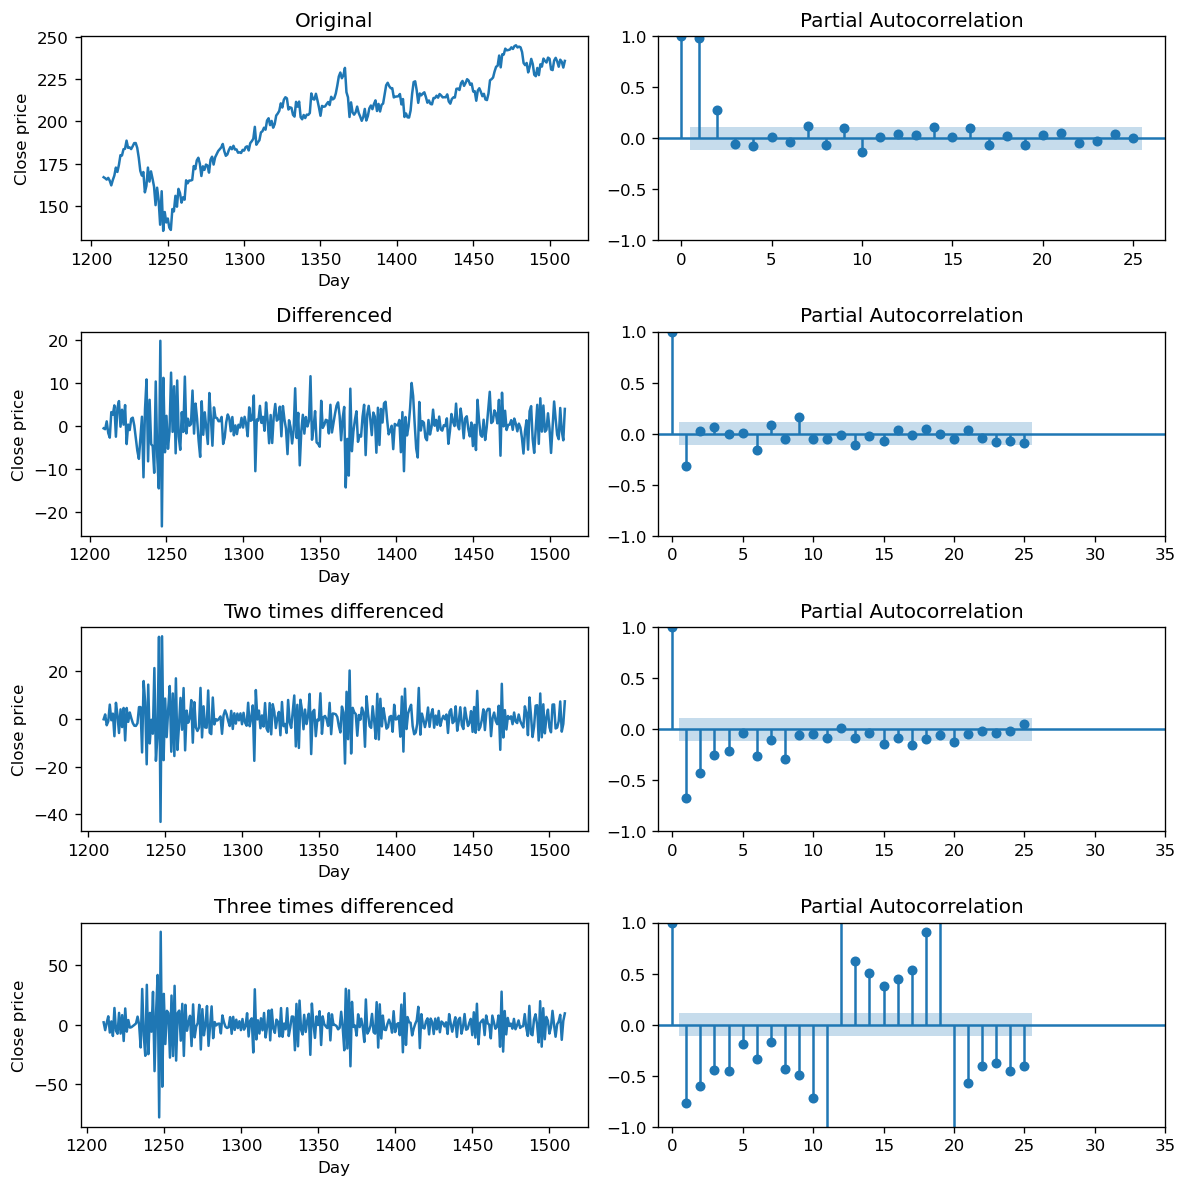

In [97]:
plt.rcParams.update({'figure.figsize':(10,10), 'figure.dpi':120})
fig , axes=plt.subplots(4,2)
series_test=pd.Series(test_set)
axes[0,0].plot(series_test)
axes[0,0].set_title('Original')
axes[0,0].set_xlabel('Day')
axes[0,0].set_ylabel('Close price')

plot_pacf(series_test, ax=axes[0,1])

axes[1,0].plot(series_test.diff().dropna())
axes[1,0].set_title('Differenced')
plot_pacf(series_test.diff().dropna(), ax=axes[1,1])
axes[1,1].set_xlim([-1, 35])
axes[1,0].set_xlabel('Day')
axes[1,0].set_ylabel('Close price')

axes[2,0].plot(series_test.diff().diff().dropna())
axes[2,0].set_title('Two times differenced')
plot_pacf(series_test.diff().diff().dropna(), ax=axes[2,1])
axes[2,1].set_xlim([-1, 35])
axes[2,0].set_xlabel('Day')
axes[2,0].set_ylabel('Close price')

axes[3,0].plot(series_test.diff().diff().diff().dropna())
axes[3,0].set_title('Three times differenced')
plot_pacf(series_test.diff().diff().diff().dropna(), ax=axes[3,1])
axes[3,1].set_xlim([-1, 35])
axes[3,0].set_xlabel('Day')
axes[3,0].set_ylabel('Close price')

plt.tight_layout()
plt.show()

# Exponential Smoothing

## Simple Exponential Smoothing of differenced series

In [107]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing

# prepare data
series=df['Close']
start=int(len(series)*.8)
end=int(len(series))
train_set=series.iloc[:int(len(series)*.8)]
test_set=series.iloc[int(len(series)*.8):]

#make the model and fit  it on train_set
model = SimpleExpSmoothing(train_set.diff().dropna(), initialization_method="estimated").fit()
# make prediction
y_pred = model.forecast(len(test_set))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


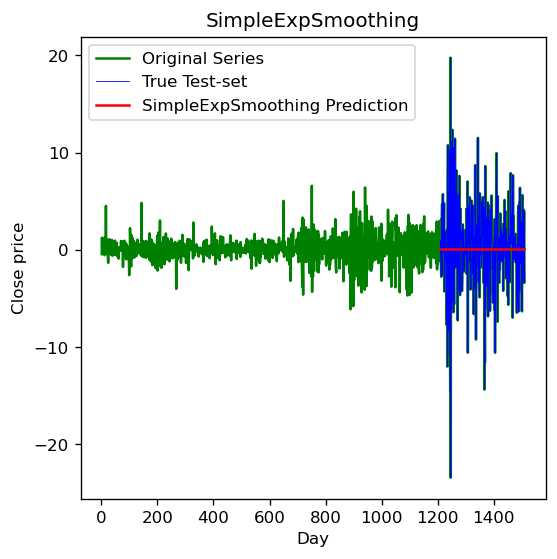

In [108]:
plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':120});

plt.plot(series.diff().dropna(),'g-',label='Original Series')
plt.plot(test_set.diff().dropna(),linewidth=.5,color='blue',label='True Test-set')
plt.plot(y_pred,'r-',label='SimpleExpSmoothing Prediction')


plt.xlabel('Day')
plt.ylabel('Close price')
plt.legend(loc='upper left')
plt.title('SimpleExpSmoothing')

plt.show();

# Double Exponential Smoothing 

### Grid search for alpha and beta

In [85]:
from statsmodels.tsa.api import  Holt
from  sklearn.metrics import mean_absolute_percentage_error

In [96]:
alphas=[.1,.2,.3,.4,.5,.6,.7,.8,.9]
betas=[.1,.2,.3,.4,.5,.6,.7,.8,.9]

series=df['Close']
start=int(len(series)*.8)
end=int(len(series))
train_set=series.iloc[:int(len(series)*.8)]
test_set=series.iloc[int(len(series)*.8):]

min_error=100
best_parameters=[]
for alpha in alphas:
    for beta in betas:
        
        try:
            model = Holt(train_set).fit(smoothing_level = alpha,smoothing_trend = beta)

            y_pred = model.forecast(len(test_set))
            error  = mean_absolute_percentage_error(y_pred,test_set)
            print('--------------------------------')
            print(f'alpha = {alpha} , beta = {beta} , error% = {error}')
            if error<min_error :
                min_error=error
                best_parameters=[alpha, beta]
        except:
            print(f'alpha = {alpha} , beta = {beta} , error% = {None}')


--------------------------------
alpha = 0.1 , beta = 0.1 , error% = 0.11767513306601206
--------------------------------
alpha = 0.1 , beta = 0.2 , error% = 0.17857799029733926
--------------------------------
alpha = 0.1 , beta = 0.3 , error% = 0.17482733575959883
--------------------------------
alpha = 0.1 , beta = 0.4 , error% = 0.11599113364958638
--------------------------------
alpha = 0.1 , beta = 0.5 , error% = 0.09019875938230044
--------------------------------
alpha = 0.1 , beta = 0.6 , error% = 0.12734377451719636
--------------------------------
alpha = 0.1 , beta = 0.7 , error% = 0.20711068958065568
--------------------------------
alpha = 0.1 , beta = 0.8 , error% = 0.2928235658931289
--------------------------------
alpha = 0.1 , beta = 0.9 , error% = 0.36266387796672583
--------------------------------
alpha = 0.2 , beta = 0.1 , error% = 0.14675129871424922
--------------------------------
alpha = 0.2 , beta = 0.2 , error% = 0.17603431785843204
----------------------

In [93]:
print(f'for least value of error = {min_error} , alpha = {best_parameters[0]} , beta = {best_parameters[1]}')

for least value of error = 0.09019875938230044 , alpha = 0.1 , beta = 0.5


#### Plot results for best model

In [109]:
series=df['Close']
start=int(len(series)*.8)
end=int(len(series))
train_set=series.iloc[:int(len(series)*.8)]
test_set=series.iloc[int(len(series)*.8):]

alpha=best_parameters[0]
beta=best_parameters[1]

model = Holt(train_set).fit(smoothing_level = alpha,smoothing_trend = beta)
y_pred = model.forecast(len(test_set))


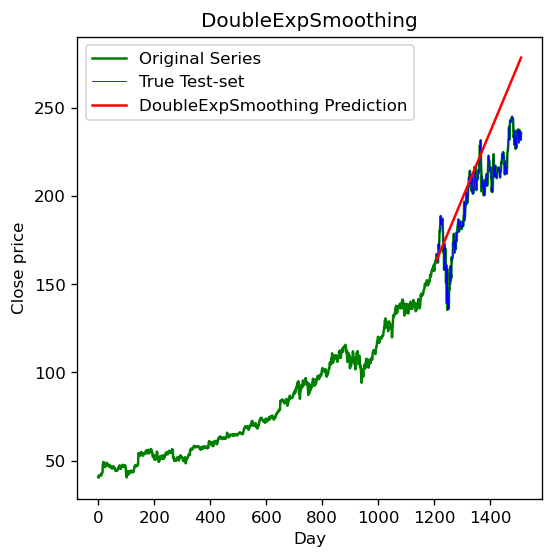

In [110]:
plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':120});

plt.plot(series,'g-',label='Original Series')
plt.plot(test_set,linewidth=.5,color='blue',label='True Test-set')
plt.plot(y_pred,'r-',label='DoubleExpSmoothing Prediction')


plt.xlabel('Day')
plt.ylabel('Close price')
plt.legend(loc='upper left')
plt.title('DoubleExpSmoothing')

plt.show();

# LSTM

## Univariant

In [6]:
from keras.models import Sequential
from keras.layers import Dense,LSTM
import numpy as np

In [34]:
data_path="C:\\workspace\\Time serie_learning\\Microsoft_Stock.csv"
df=pd.read_csv(data_path)

In [43]:
def df_shift(df,col, lag_order):
    
    df_shift_output=df[col].copy()
    lag_list=[]
    col_name_list=[]
    for i in range(lag_order):
        lag_list.append(df_shift_output.shift(i))
        col_name_list.append('lag_'+str(i))
        
    return pd.concat(lag_list,axis=1,keys=col_name_list)

In [44]:
df_shift(df,'Close',4).isnull().sum()

lag_0    0
lag_1    1
lag_2    2
lag_3    3
dtype: int64

In [49]:
df_shifted=df_shift(df,'Close',4).copy().dropna(axis=0)

In [51]:
df_shifted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1508 entries, 3 to 1510
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lag_0   1508 non-null   float64
 1   lag_1   1508 non-null   float64
 2   lag_2   1508 non-null   float64
 3   lag_3   1508 non-null   float64
dtypes: float64(4)
memory usage: 58.9 KB


In [54]:
x=df_shifted.drop(columns=['lag_0']).copy()
y=df_shifted['lag_0'].copy()

In [55]:
len(y)

1508

In [58]:
train_portion=.8
train_size=int(len(y)*train_portion)
test_size=int(len(y)-train_size)
x_train=np.array(x.iloc[:train_size]).reshape(train_size,1,x.shape[1])
x_test=np.array(x.iloc[train_size:]).reshape(test_size,1,x.shape[1])
y_train=np.array(y.iloc[:train_size]).reshape(train_size,1)
y_test=np.array(y.iloc[train_size:]).reshape(test_size,1)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(1206, 1, 3) (1206, 1)
(302, 1, 3) (302, 1)


In [59]:
Model=Sequential()
Model.add(LSTM(32,input_shape=(x_train.shape[1],x_train.shape[2]),activation='relu',return_sequences=False))
Model.add(Dense(1,activation='linear'))

In [60]:
Model.compile(optimizer='adam',loss='mae')

In [61]:
Model.fit(x_train,y_train,epochs=20,shuffle=False)

Epoch 1/20
38/38 [==============================] - 1s 2ms/step - loss: 73.6748
Epoch 2/20
38/38 [==============================] - 0s 1ms/step - loss: 35.9196
Epoch 3/20
38/38 [==============================] - 0s 1ms/step - loss: 4.4000
Epoch 4/20
38/38 [==============================] - 0s 1ms/step - loss: 0.9772
Epoch 5/20
38/38 [==============================] - 0s 1ms/step - loss: 0.9301
Epoch 6/20
38/38 [==============================] - 0s 1ms/step - loss: 0.9219
Epoch 7/20
38/38 [==============================] - 0s 1ms/step - loss: 0.9252
Epoch 8/20
38/38 [==============================] - 0s 1ms/step - loss: 0.9331
Epoch 9/20
38/38 [==============================] - 0s 1ms/step - loss: 0.9265
Epoch 10/20
38/38 [==============================] - 0s 1ms/step - loss: 0.9276
Epoch 11/20
38/38 [==============================] - 0s 1ms/step - loss: 0.9330
Epoch 12/20
38/38 [==============================] - 0s 1ms/step - loss: 0.9294
Epoch 13/20
38/38 [============================

In [62]:
y_pred=Model.predict(x_test)

10/10 [==============================] - 0s 2ms/step


In [1]:
plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':120});

plt.plot(y_test,'g-',label='Original Series')
plt.plot(y_pred,'r-',label='LSTM Prediction')

 
plt.xlabel('Day')
plt.ylabel('Close price')
plt.legend(loc='upper left')

plt.title('LSTM with one input: Close Price')

NameError: name 'plt' is not defined

## Multivariant  
Features: Open, Low, High, Close

In [64]:
from keras.models import Sequential
from keras.layers import Dense,LSTM
import numpy as np

In [83]:
data_path="C:\\workspace\\Time serie_learning\\Microsoft_Stock.csv"
df=pd.read_csv(data_path)

float columns of df :

In [98]:
 float_col=[]
for col in df.columns:
    if df[col].dtype==float:
        float_col+=[col]
# float_col

### prepare the dataframe of lags of all features

In [99]:
def make_shift(df,col, lag_order):
    
    df_shift_output=df[col].copy()
    lag_list=[]
    col_name_list=[]
    for i in range(1,lag_order):
        lag_list.append(df_shift_output.shift(i))
        col_name_list.append(col+'_lag_'+str(i))
        
    return pd.concat(lag_list,axis=1,keys=col_name_list)

In [100]:
df_shifted=df['Close'].copy()
for col in float_col:
    df_shifted=pd.concat([df_shifted,make_shift(df,col,4)],axis=1)
# df_shifted.dropna(axis=0,inplace=True)

In [103]:
df_shifted.dropna(axis=0,inplace=True)

In [104]:
df_shifted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1508 entries, 3 to 1510
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Close        1508 non-null   float64
 1   Open_lag_1   1508 non-null   float64
 2   Open_lag_2   1508 non-null   float64
 3   Open_lag_3   1508 non-null   float64
 4   High_lag_1   1508 non-null   float64
 5   High_lag_2   1508 non-null   float64
 6   High_lag_3   1508 non-null   float64
 7   Low_lag_1    1508 non-null   float64
 8   Low_lag_2    1508 non-null   float64
 9   Low_lag_3    1508 non-null   float64
 10  Close_lag_1  1508 non-null   float64
 11  Close_lag_2  1508 non-null   float64
 12  Close_lag_3  1508 non-null   float64
dtypes: float64(13)
memory usage: 164.9 KB


In [110]:
x=df_shifted.drop(columns=['Close']).copy()
y=df_shifted['Close']


### Split data to train and test set

In [111]:
train_portion=.8
train_size=int(x.shape[0]*train_portion)
test_size=x.shape[0]-train_size

In [114]:
x_train=np.array(x.iloc[:train_size]).reshape(train_size,1,x.shape[1])
x_test=np.array(x.iloc[train_size:]).reshape(test_size,1,x.shape[1])

y_train=np.array(y.iloc[:train_size]).reshape(-1,1)
y_test=np.array(y.iloc[train_size:]).reshape(-1,1)


print(f' x_train.shape = {x_train.shape} ,  y_train.shape =  {y_train.shape}')
print(f' x_test.shape = {x_test.shape} ,  y_test.shape =  {y_test.shape}')

 x_train.shape = (1206, 1, 12) ,  y_train.shape =  (1206, 1)
 x_test.shape = (302, 1, 12) ,  y_test.shape =  (302, 1)


### Make the model

In [116]:
Model=Sequential()
Model.add(LSTM(32,input_shape=(x_train.shape[1],x_train.shape[2]),activation='relu',return_sequences=False))
Model.add(Dense(1,activation='linear'))

In [117]:
Model.compile(optimizer='adam',loss='mae')

In [118]:
Model.fit(x_train,y_train,epochs=20,shuffle=False)

Epoch 1/20
38/38 [==============================] - 1s 1ms/step - loss: 33.4260
Epoch 2/20
38/38 [==============================] - 0s 1ms/step - loss: 2.5601
Epoch 3/20
38/38 [==============================] - 0s 1ms/step - loss: 1.3077
Epoch 4/20
38/38 [==============================] - 0s 1ms/step - loss: 1.2956
Epoch 5/20
38/38 [==============================] - 0s 1ms/step - loss: 1.2891
Epoch 6/20
38/38 [==============================] - 0s 1ms/step - loss: 1.2774
Epoch 7/20
38/38 [==============================] - 0s 1ms/step - loss: 1.2821
Epoch 8/20
38/38 [==============================] - 0s 1ms/step - loss: 1.2858
Epoch 9/20
38/38 [==============================] - 0s 1ms/step - loss: 1.2601
Epoch 10/20
38/38 [==============================] - 0s 1ms/step - loss: 1.2484
Epoch 11/20
38/38 [==============================] - 0s 1ms/step - loss: 1.2518
Epoch 12/20
38/38 [==============================] - 0s 1ms/step - loss: 1.2465
Epoch 13/20
38/38 [=============================

### Make the prediction on test set:

In [119]:
y_pred=Model.predict(x_test)

10/10 [==============================] - 0s 2ms/step


Text(0.5, 1.0, 'LSTM with 4 input: Open , High , Low , Close Price')

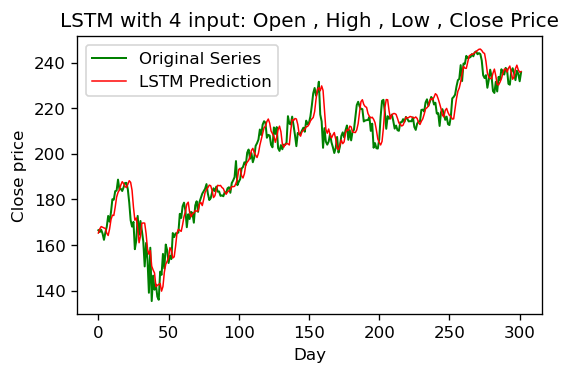

In [121]:
plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':120});

plt.plot(y_test,'g-',linewidth=1.2,label='Original Series')
plt.plot(y_pred,'r-',linewidth=.9,label='LSTM Prediction')

 
plt.xlabel('Day')
plt.ylabel('Close price')
plt.legend(loc='upper left')

plt.title('LSTM with 4 input: Open , High , Low , Close Price')

# VAR

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
import numpy as np


In [4]:
data_path="C:\\workspace\\Time serie_learning\\Microsoft_Stock.csv"
df=pd.read_csv(data_path)

In [6]:
df.drop(columns=['Date'],inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1511 non-null   float64
 1   High    1511 non-null   float64
 2   Low     1511 non-null   float64
 3   Close   1511 non-null   float64
 4   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.1 KB


## Check (Non)stationary with adfuller test  


In [9]:
from pmdarima.arima.utils import ndiffs

In [11]:
for col in df.columns:
    print (f" for col = {col} , diff order = {ndiffs(df[col], test='adf')}")

 for col = Open , diff order = 1
 for col = High , diff order = 1
 for col = Low , diff order = 1
 for col = Close , diff order = 1
 for col = Volume , diff order = 0


In [12]:
x=pd.concat([df.Open.diff(),df.High.diff(),df.Low.diff(),df.Close.diff(),df.Volume],axis=1).dropna(axis=0)

In [15]:
x.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

### Split data to train and test set

In [16]:
train_portion=.8
train_size=int(x.shape[0]*train_portion)
test_size=x.shape[0]-train_size

In [17]:
x_train=np.array(x.iloc[:train_size])
x_test=np.array(x.iloc[train_size:])

print(f' x_train.shape = {x_train.shape} ,  x_test.shape = {x_test.shape} ')

 x_train.shape = (1208, 5) ,  x_test.shape = (302, 5) 


## Grid search for P

In [34]:
least_AIC=float('inf')
least_BIC=float('inf')
max_p=12
best_p=0
for i in range(1,max_p):
    model = VAR(x_train)
    results = model.fit(i)
    
    if results.aic<least_AIC:
        least_AIC=results.aic
        best_p=i
        
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()
    
print('----------------------')
print(f' best p is = {best_p}')

Order = 1
AIC:  29.088742192372994
BIC:  29.215400681712616

Order = 2
AIC:  28.566195607926048
BIC:  28.7985575820146

Order = 3
AIC:  28.360011887617336
BIC:  28.69821835041732

Order = 4
AIC:  28.254576660397984
BIC:  28.69876892428189

Order = 5
AIC:  28.170020080281155
BIC:  28.72033976696171

Order = 6
AIC:  28.147937066159805
BIC:  28.804526107623822

Order = 7
AIC:  28.11769162415879
BIC:  28.880692263604583

Order = 8
AIC:  28.064181571811243
BIC:  28.93373636458966

Order = 9
AIC:  28.04428159088198
BIC:  29.020533405441054

Order = 10
AIC:  28.039616410673325
BIC:  29.12270842950657

Order = 11
AIC:  28.0403121343379
BIC:  29.230387854936257

----------------------
 best p is = 10


## Make prediction for feuture, extrapolating 

**Note that the lag_number should be greater than p**

In [39]:
lag_number=-12
lagged_Values = x_train[lag_number:]

In [40]:
lagged_Values.shape

(12, 5)

In [41]:
model = VAR(x_train)
result = model.fit(best_p)

In [42]:
y_pred=result.forecast(lagged_Values, steps=test_size) 

In [44]:
y_pred.shape

(302, 5)

### Plot Close Price Forecast

Text(0, 0.5, 'Close Price')

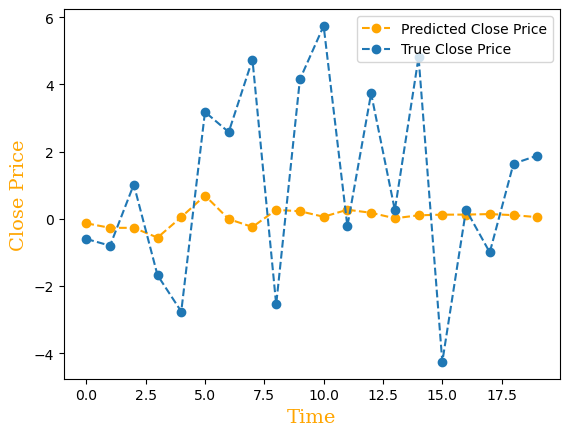

In [60]:
display_size=20
plt.plot(y_pred[:display_size,3], 'o--',color='orange',label='Predicted Close Price')
plt.plot(x_test[:display_size,3], 'o--', label='True Close Price')


font_dict={'family':'serif','size':14,'color':'orange'}
plt.legend(loc='upper right')
plt.xlabel('Time',fontdict=font_dict)
plt.ylabel('Close Price',fontdict=font_dict)

### Plot Volume Price Forecast

Text(0, 0.5, 'High Price')

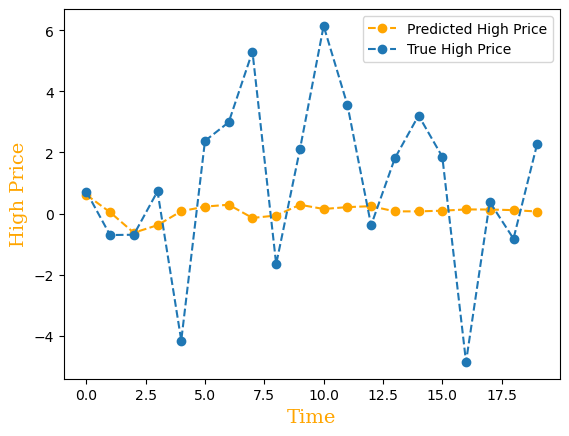

In [64]:
display_size=20
plt.plot(y_pred[:display_size,1], 'o--',color='orange',label='Predicted High Price')
plt.plot(x_test[:display_size,1], 'o--', label='True High Price')


font_dict={'family':'serif','size':14,'color':'orange'}
plt.legend(loc='upper right')
plt.xlabel('Time',fontdict=font_dict)
plt.ylabel('High Price',fontdict=font_dict)

### Plot Hight Price Forecast

Text(0, 0.5, 'High Price')

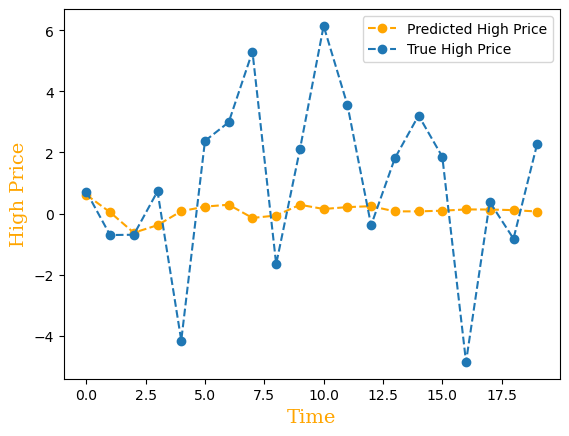

In [64]:
display_size=20
plt.plot(y_pred[:display_size,1], 'o--',color='orange',label='Predicted High Price')
plt.plot(x_test[:display_size,1], 'o--', label='True High Price')


font_dict={'family':'serif','size':14,'color':'orange'}
plt.legend(loc='upper right')
plt.xlabel('Time',fontdict=font_dict)
plt.ylabel('High Price',fontdict=font_dict)

# Phacebook Prophet

In [7]:
from prophet import Prophet

In [8]:
from datetime import *

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [10]:
data_path="C:\\workspace\\Time serie_learning\\Microsoft_Stock.csv"
df=pd.read_csv(data_path)

## Prepare the dataframe for facebook prophet 

### Prepare the date time column

In [11]:
df['Date']=df['Date'].apply(lambda x: x.replace('/','-'))

In [12]:
df['Date']=df['Date'].apply(lambda x: x.split(' '))

In [13]:
df['Date_Date']=df['Date'].apply(lambda x: datetime.strptime(x[0], '%m-%d-%Y').date())

In [14]:
df['Date_Time']=df['Date'].apply(lambda x: datetime.strptime(x[1], '%H:%M:%S').time())

In [15]:
df['Date'] = pd.to_datetime(df.apply(lambda x: datetime.combine(x['Date_Date'],x['Date_Time']), axis=1))

In [16]:
df.drop(columns=['Date_Date','Date_Time'],inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1511 non-null   datetime64[ns]
 1   Open    1511 non-null   float64       
 2   High    1511 non-null   float64       
 3   Low     1511 non-null   float64       
 4   Close   1511 non-null   float64       
 5   Volume  1511 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 71.0 KB


In [18]:
df_for_prophet=df[['Date','Close']].copy()

### Renaming the columns

In [19]:
df_for_prophet.rename(columns={'Date':'ds','Close':'y'},inplace='True')

In [20]:
df_for_prophet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1511 non-null   datetime64[ns]
 1   y       1511 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.7 KB


## Prepare the Facbook prophet Model

### Prepare the Train_set and test set:

In [21]:
train_posrtion=.8
train_size=int(len(df['Close'])*train_posrtion)
test_size=int(len(df['Close'])-train_size)
df_train=df_for_prophet.iloc[:train_size]
df_test=df_for_prophet.iloc[train_size:]

### Train the model

In [22]:
prophet_model = Prophet()
prophet_model.fit(df_train)

10:05:33 - cmdstanpy - INFO - Chain [1] start processing
10:05:33 - cmdstanpy - INFO - Chain [1] done processing


### Make the future dataframe 

In [23]:
future_df = prophet_model.make_future_dataframe(periods=test_size, freq = "D", include_history = True)

In [24]:
df_for_prophet

ds       y
0    2015-04-01 16:00:00   40.72
1    2015-04-02 16:00:00   40.29
2    2015-04-06 16:00:00   41.55
3    2015-04-07 16:00:00   41.53
4    2015-04-08 16:00:00   41.42
...                  ...     ...
1506 2021-03-25 16:00:00  232.34
1507 2021-03-26 16:00:00  236.48
1508 2021-03-29 16:00:00  235.24
1509 2021-03-30 16:00:00  231.85
1510 2021-03-31 16:00:00  235.77

[1511 rows x 2 columns]

In [25]:
future_df

ds
0    2015-04-01 16:00:00
1    2015-04-02 16:00:00
2    2015-04-06 16:00:00
3    2015-04-07 16:00:00
4    2015-04-08 16:00:00
...                  ...
1506 2020-11-10 16:00:00
1507 2020-11-11 16:00:00
1508 2020-11-12 16:00:00
1509 2020-11-13 16:00:00
1510 2020-11-14 16:00:00

[1511 rows x 1 columns]

### Make the prediction on future dataframe

In [26]:
forecast_y = prophet_model.predict(future_df)

In [27]:
forecast_y.head(2)

ds      trend  yhat_lower  yhat_upper  trend_lower  \
0 2015-04-01 16:00:00  31.753924   40.007286   45.093638    31.753924   
1 2015-04-02 16:00:00  31.782107   40.139177   45.195604    31.782107   

   trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0    31.753924       10.700419             10.700419             10.700419   
1    31.782107       10.796635             10.796635             10.796635   

       daily  ...     weekly  weekly_lower  weekly_upper    yearly  \
0 -11.933826  ...  20.445297     20.445297     20.445297  2.188948   
1 -11.933826  ...  20.522600     20.522600     20.522600  2.207862   

   yearly_lower  yearly_upper  multiplicative_terms  \
0      2.188948      2.188948                   0.0   
1      2.207862      2.207862                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper       yhat  
0                         0.0                         0.0  42.454343  
1                         0.0                         0.0  42.578743  

[2 rows x 22 columns]

In [28]:
forecast_y[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
1506 2020-11-10 16:00:00  205.838749  163.186137  251.047341
1507 2020-11-11 16:00:00  205.993445  161.819549  250.329495
1508 2020-11-12 16:00:00  206.226326  162.066708  250.539667
1509 2020-11-13 16:00:00  206.434603  162.680943  250.845532
1510 2020-11-14 16:00:00  142.809623   97.950125  188.286668

### Plot using the internal plot of prophet

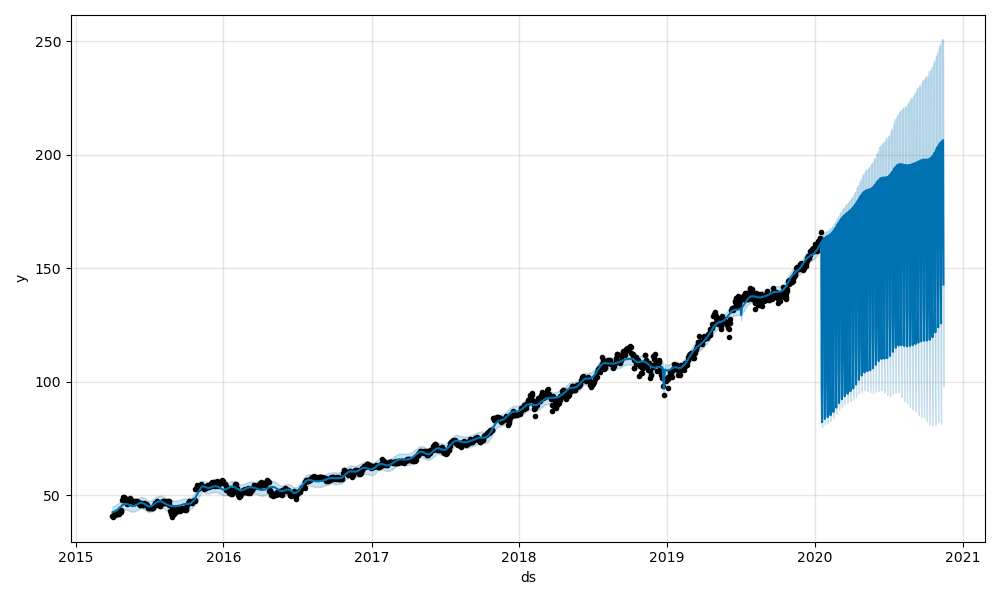

In [29]:
prophet_model.plot(forecast_y);


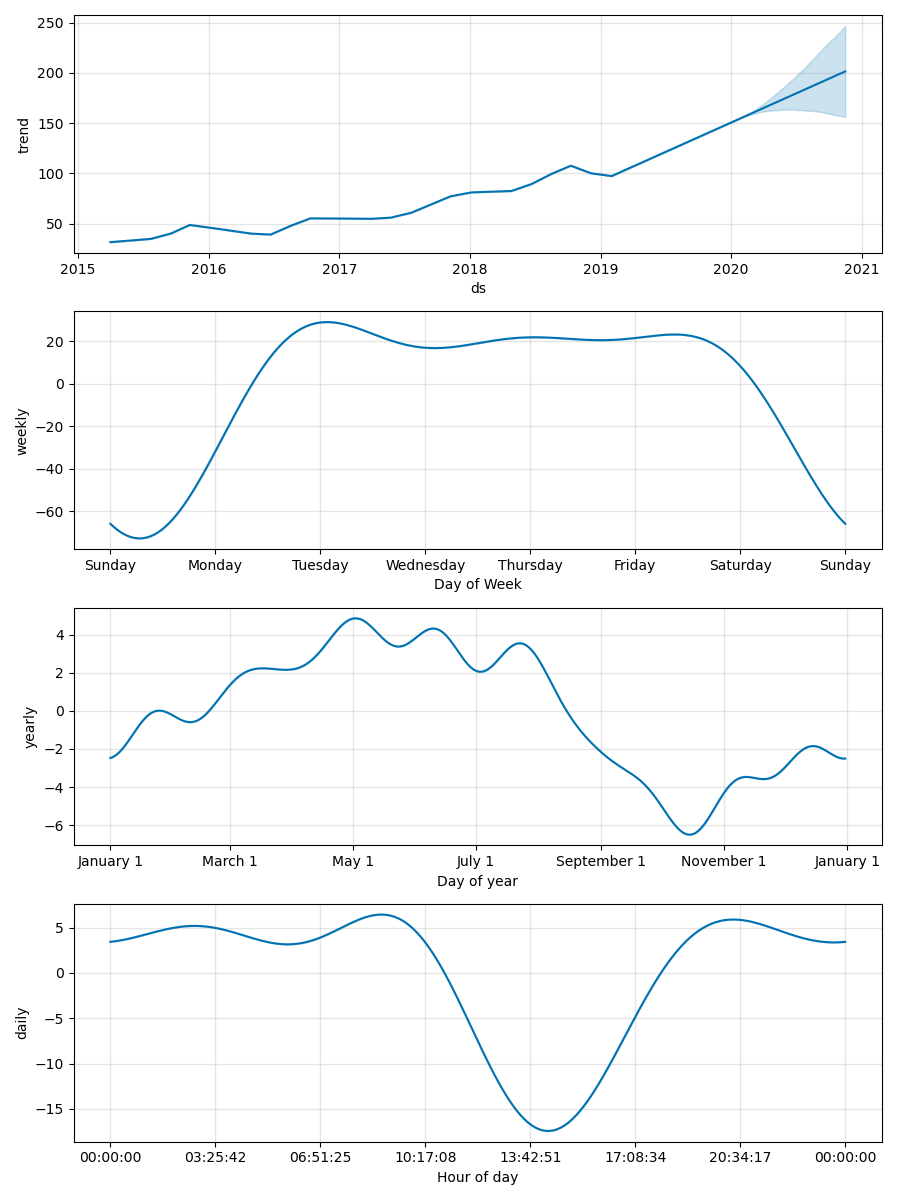

In [30]:
fig2 = prophet_model.plot_components(forecast_y)

Text(0.5, 1.0, 'Comparison of Facebook prophet and true values')

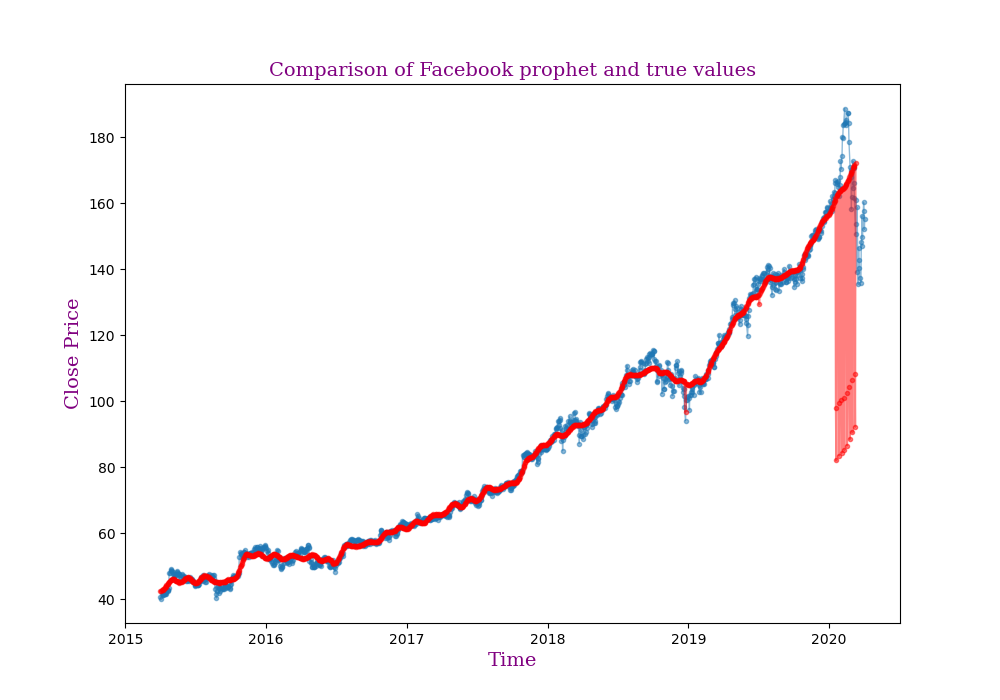

In [31]:
up_limit=len(df['Date'])-250
plt.figure(figsize=(10,7))
font_dict={'family':'serif','size':14,'color':'purple'}

plt.plot(df['Date'].iloc[:up_limit],df['Close'].iloc[:up_limit],'.-',linewidth=1,alpha=.5,label='True Close Price')
plt.plot(forecast_y['ds'].iloc[:up_limit], forecast_y['yhat'].iloc[:up_limit],'.-',alpha=.5,color='red',label='Facebook Prophet Prediction')#, 'yhat_lower', 'yhat_upper']])
plt.xlabel('Time',fontdict=font_dict)
plt.ylabel('Close Price',fontdict=font_dict)
plt.title('Comparison of Facebook prophet and true values',fontdict=font_dict)

## Facebook Prophet for 80% of series

In [1]:
from prophet import Prophet

In [2]:
from datetime import *

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [4]:
data_path="C:\\workspace\\Time serie_learning\\Microsoft_Stock.csv"
df=pd.read_csv(data_path)

## Prepare the dataframe for facebook prophet 

### Prepare the date time column

In [5]:
df['Date']=df['Date'].apply(lambda x: x.replace('/','-'))

In [6]:
df['Date']=df['Date'].apply(lambda x: x.split(' '))

In [7]:
df['Date_Date']=df['Date'].apply(lambda x: datetime.strptime(x[0], '%m-%d-%Y').date())

In [8]:
df['Date_Time']=df['Date'].apply(lambda x: datetime.strptime(x[1], '%H:%M:%S').time())

In [9]:
df['Date'] = pd.to_datetime(df.apply(lambda x: datetime.combine(x['Date_Date'],x['Date_Time']), axis=1))

In [10]:
df.drop(columns=['Date_Date','Date_Time'],inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1511 non-null   datetime64[ns]
 1   Open    1511 non-null   float64       
 2   High    1511 non-null   float64       
 3   Low     1511 non-null   float64       
 4   Close   1511 non-null   float64       
 5   Volume  1511 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 71.0 KB


In [14]:
df_for_prophet=df[['Date','Close']].copy()

### Renaming the columns

In [15]:
df_for_prophet.rename(columns={'Date':'ds','Close':'y'},inplace='True')

In [16]:
df_for_prophet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1511 non-null   datetime64[ns]
 1   y       1511 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.7 KB


In [17]:
df_for_prophet

ds       y
0    2015-04-01 16:00:00   40.72
1    2015-04-02 16:00:00   40.29
2    2015-04-06 16:00:00   41.55
3    2015-04-07 16:00:00   41.53
4    2015-04-08 16:00:00   41.42
...                  ...     ...
1506 2021-03-25 16:00:00  232.34
1507 2021-03-26 16:00:00  236.48
1508 2021-03-29 16:00:00  235.24
1509 2021-03-30 16:00:00  231.85
1510 2021-03-31 16:00:00  235.77

[1511 rows x 2 columns]

## Prepare the Facbook prophet Model

### Prepare the Train_set and test set:

In [21]:
train_posrtion=.8
df_80=df_for_prophet.iloc[:int(len(df)*train_posrtion)]
train_size=int(len(df_80['y'])*train_posrtion)
test_size=int(len(df_80['y'])-train_size)
df_train=df_80.iloc[:train_size]
df_test=df_80.iloc[train_size:]

### Train the model

In [47]:
prophet_model = Prophet()
prophet_model.fit(df_train)

10:06:06 - cmdstanpy - INFO - Chain [1] start processing
10:06:06 - cmdstanpy - INFO - Chain [1] done processing


### Make the future dataframe 

In [48]:
future_df = prophet_model.make_future_dataframe(periods=test_size, freq = "D", include_history = True)

### Make the prediction on future dataframe

In [49]:
forecast_y = prophet_model.predict(future_df)

### Plot using the internal plot of prophet

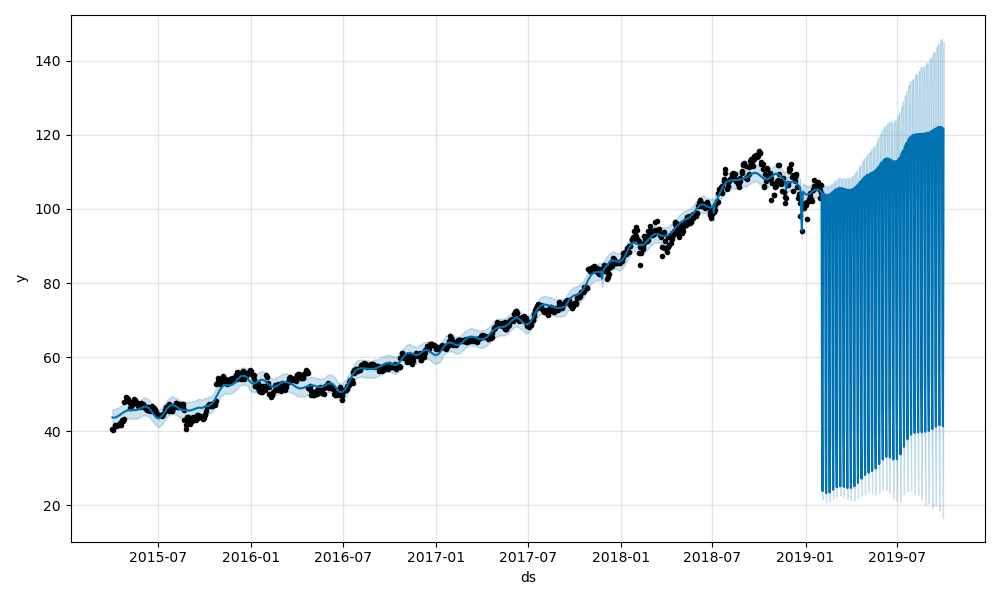

In [50]:
prophet_model.plot(forecast_y);


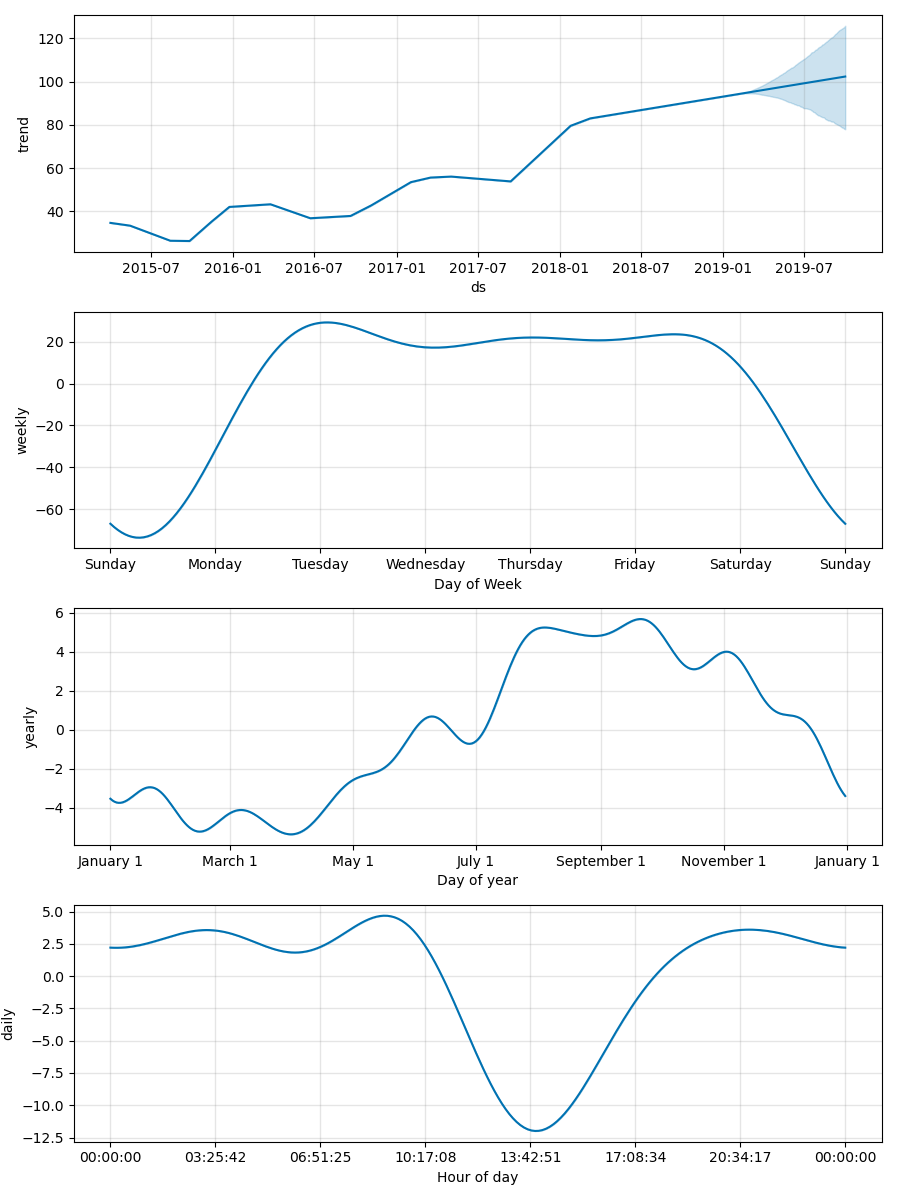

In [51]:
fig2 = prophet_model.plot_components(forecast_y)

Text(0.5, 1.0, 'Comparison of Facebook prophet and true values')

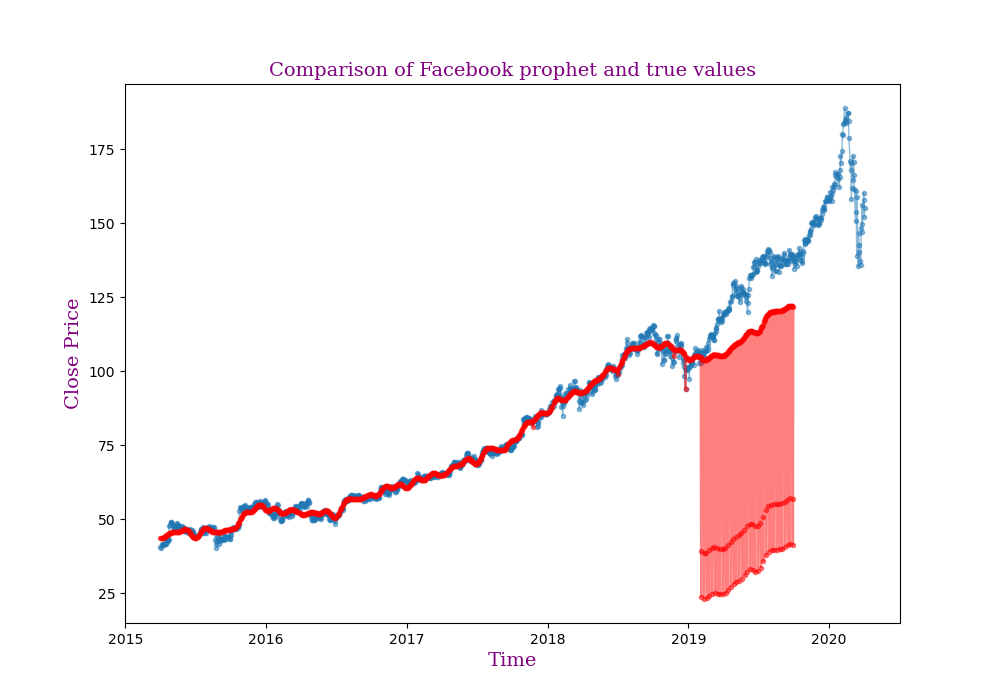

In [52]:
up_limit=len(df['Date'])-250
plt.figure(figsize=(10,7))
font_dict={'family':'serif','size':14,'color':'purple'}

plt.plot(df['Date'].iloc[:up_limit],df['Close'].iloc[:up_limit],'.-',linewidth=1,alpha=.5,label='True Close Price')
plt.plot(forecast_y['ds'].iloc[:up_limit], forecast_y['yhat'].iloc[:up_limit],'.-',alpha=.5,color='red',label='Facebook Prophet Prediction')#, 'yhat_lower', 'yhat_upper']])
plt.xlabel('Time',fontdict=font_dict)
plt.ylabel('Close Price',fontdict=font_dict)
plt.title('Comparison of Facebook prophet and true values',fontdict=font_dict)

## Plot changepoints:

In [53]:
from prophet.plot import add_changepoints_to_plot

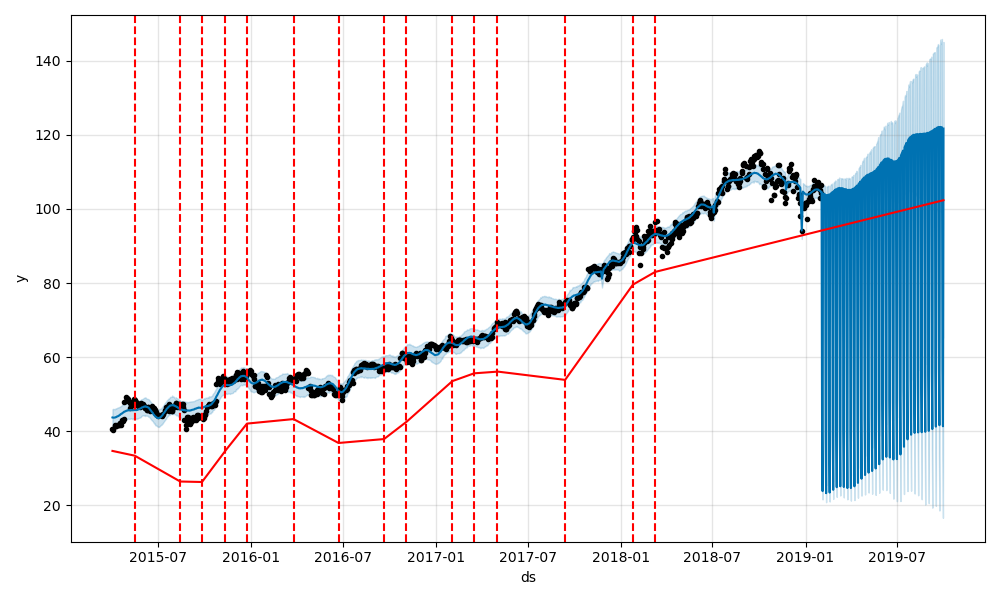

In [54]:
pred_fig=prophet_model.plot(forecast_y)
a=add_changepoints_to_plot(pred_fig.gca(), prophet_model , forecast_y)
plt.savefig('stock_auto_changepoint.png')

## Adjust changepoints scale

### Adjust changepoints scale = 0.5

In [71]:
model=Prophet(changepoint_prior_scale=.5)
pred=model.fit(df_train).predict(forecast_y)

10:17:42 - cmdstanpy - INFO - Chain [1] start processing
10:17:43 - cmdstanpy - INFO - Chain [1] done processing


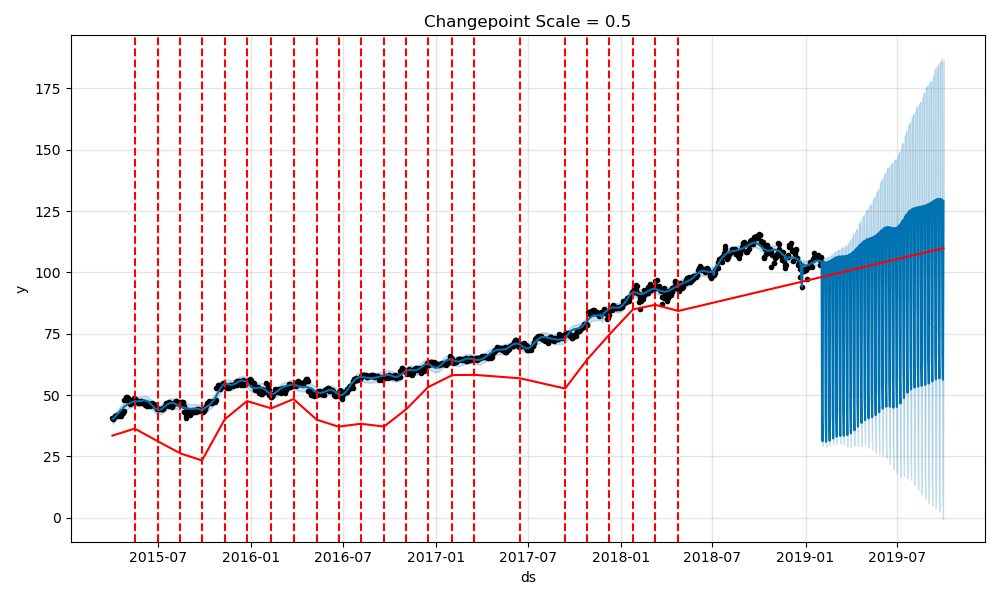

In [72]:
fig=model.plot(pred)
a=add_changepoints_to_plot(fig.gca(),model,pred)
plt.title('Changepoint Scale = 0.5')
plt.tight_layout()
plt.savefig("stock_ChangepointScale05.png")


### Adjust changepoints scale = 0.01

In [73]:
model=Prophet(changepoint_prior_scale=.01)
pred=model.fit(df_train).predict(forecast_y)

10:18:02 - cmdstanpy - INFO - Chain [1] start processing
10:18:02 - cmdstanpy - INFO - Chain [1] done processing


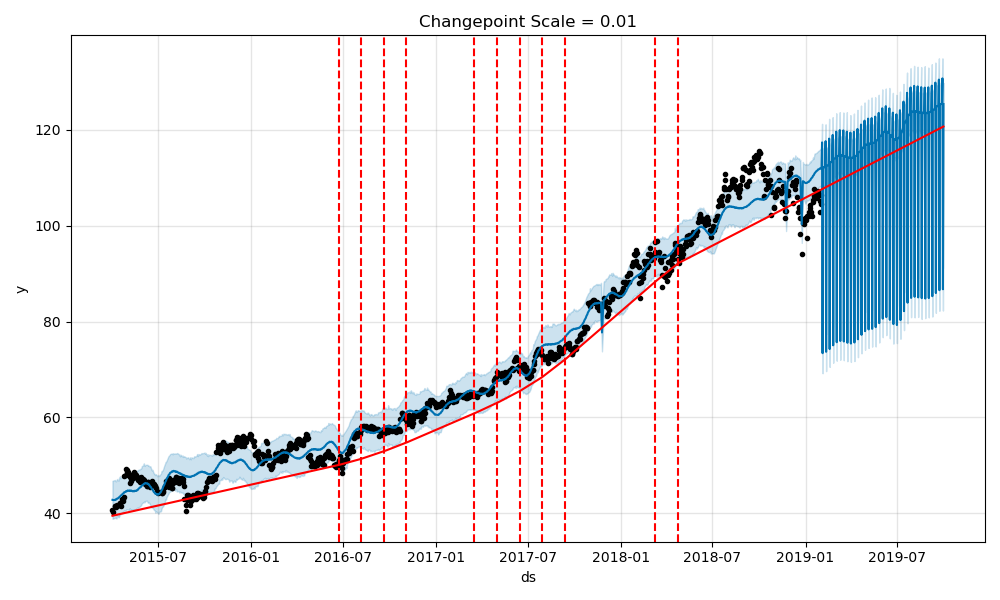

In [75]:
fig=model.plot(pred)
a=add_changepoints_to_plot(fig.gca(),model,pred)
plt.title('Changepoint Scale = 0.01')
plt.tight_layout()
plt.savefig("stock_ChangepointScale001.png")

### Changepoint List

First we get the list of changepoints from previous run of model

In [85]:
change_points_list=list(model.changepoints)+['2019-01-31 16:00:00']

In [86]:
model=Prophet(changepoints=change_points_list)
pred=model.fit(df_train).predict(forecast_y)

11:45:50 - cmdstanpy - INFO - Chain [1] start processing
11:45:51 - cmdstanpy - INFO - Chain [1] done processing


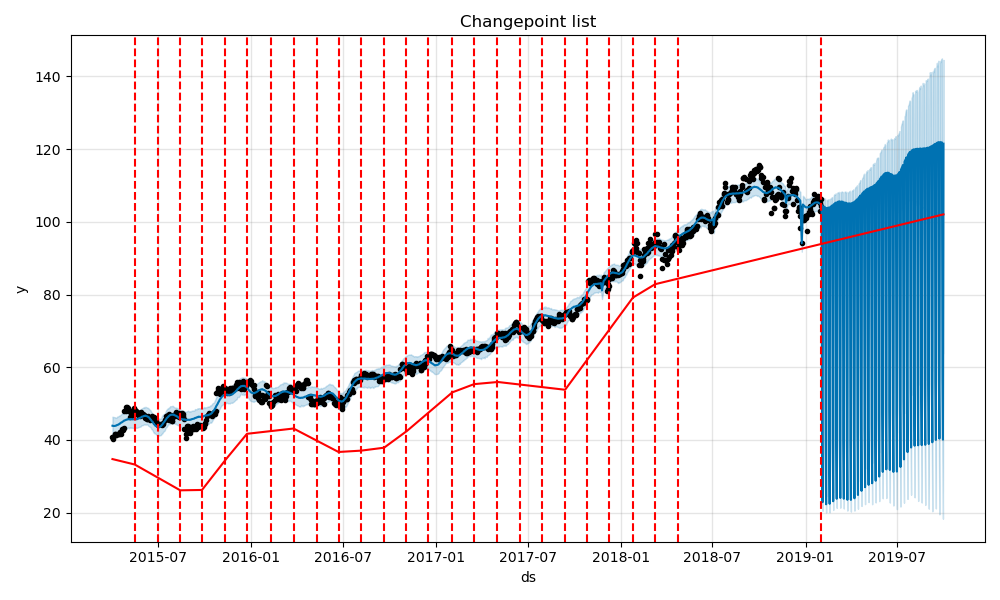

In [87]:
fig=model.plot(pred)
a=add_changepoints_to_plot(fig.gca(),model,pred,threshold=0)
plt.title('Changepoint list')
plt.tight_layout()
plt.savefig("stock_ChangepointList.png")

## Holidays

### Predefined holidays for US is used 

In [90]:
model=Prophet()
model.add_country_holidays(country_name='US')

In [91]:
pred=model.fit(df_train).predict(future_df)

15:23:34 - cmdstanpy - INFO - Chain [1] start processing
15:23:35 - cmdstanpy - INFO - Chain [1] done processing


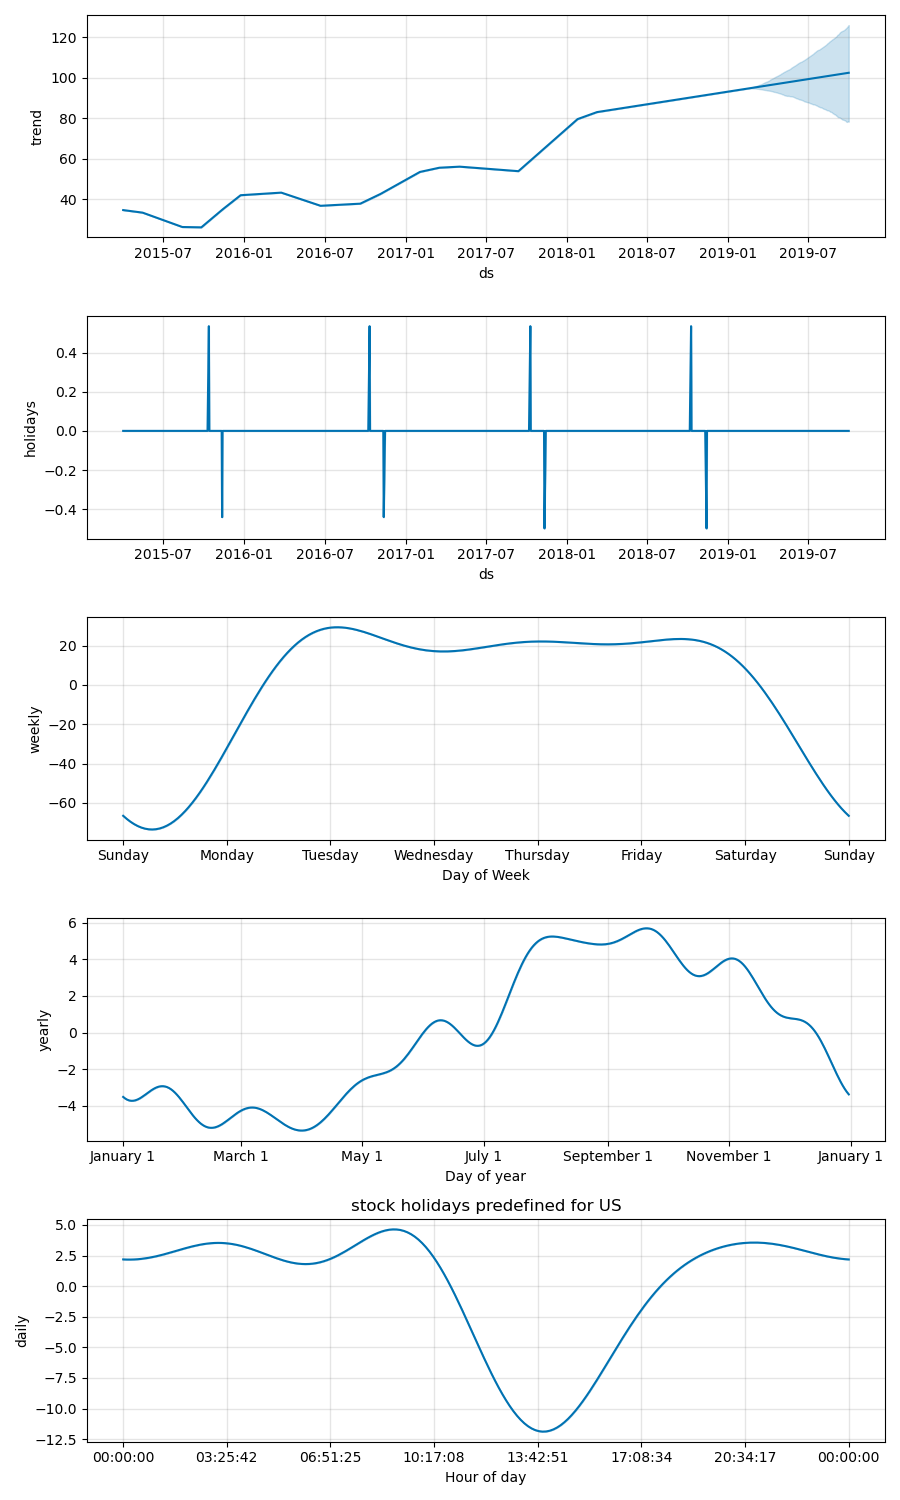

In [94]:
model.plot_components(pred);
plt.title('stock holidays predefined for US')
plt.tight_layout()
plt.savefig('stock holidays_predefined.png')


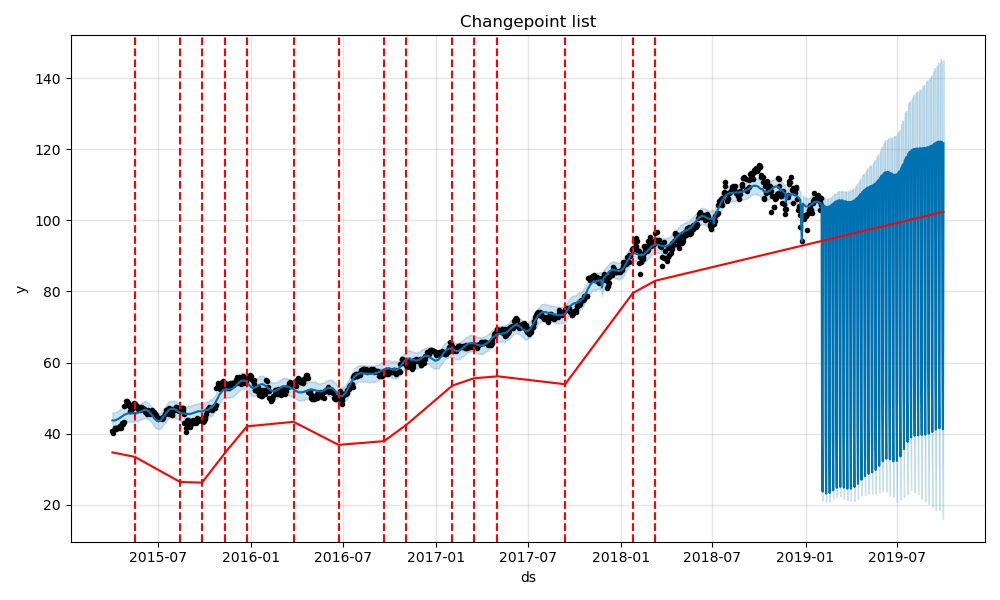

In [96]:
fig=model.plot(pred)
a=add_changepoints_to_plot(fig.gca(),model,pred)
plt.title('Changepoint list')
plt.tight_layout()

In [97]:
model.train_holiday_names

0                  New Year's Day
1      Martin Luther King Jr. Day
2           Washington's Birthday
3                    Memorial Day
4                Independence Day
5                       Labor Day
6                    Columbus Day
7                    Veterans Day
8                    Thanksgiving
9                   Christmas Day
10       Christmas Day (Observed)
11      New Year's Day (Observed)
12        Veterans Day (Observed)
13    Independence Day (Observed)
dtype: object

## Fourier order of seasonality

In [43]:
from prophet.plot import add_changepoints_to_plot
from prophet.plot import plot_yearly

In [38]:
F_order=50
prophet_model=Prophet(yearly_seasonality=F_order)
prophet_model.fit(df_train)
future_df = prophet_model.make_future_dataframe(periods=test_size, freq = "D", include_history = True)
pred=prophet_model.predict(future_df)

08:40:11 - cmdstanpy - INFO - Chain [1] start processing
08:40:12 - cmdstanpy - INFO - Chain [1] done processing


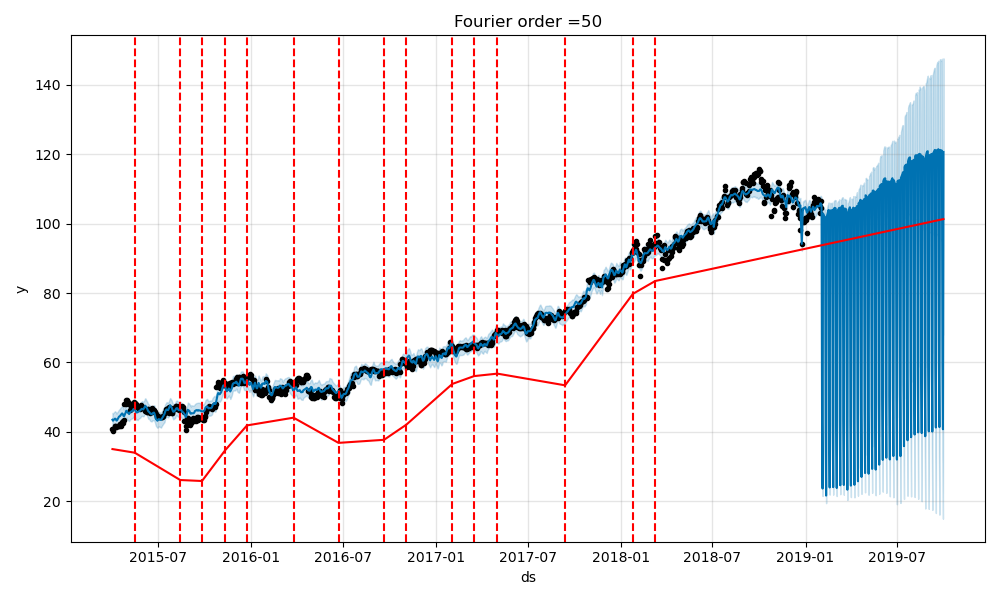

In [42]:
fig=prophet_model.plot(pred)
a=add_changepoints_to_plot(fig.gca(),prophet_model,pred)
plt.title(f'Fourier order ={F_order}')
plt.tight_layout()
plt.savefig('stock_FourierOrder=50.png')

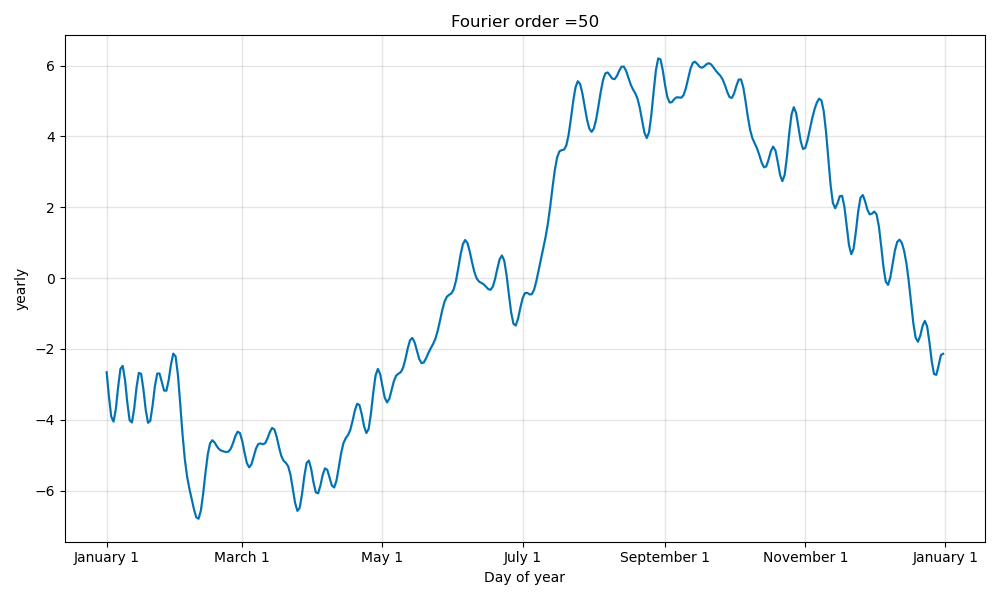

In [44]:
plot_yearly(prophet_model)
plt.title(f'Fourier order ={F_order}')
plt.tight_layout()
# plt.savefig('stock_FourierOrder=50.png')

**comparisonn of two different fourier order in yearly seasonality**

In [45]:
F_order1=50
F_order2=10

model1=Prophet(yearly_seasonality=F_order1)
model1.fit(df_train)
future_df1 = model1.make_future_dataframe(periods=test_size, freq = "D", include_history = True)
pred1=model1.predict(future_df1)

model2=Prophet(yearly_seasonality=F_order2)
model2.fit(df_train)
future_df2 = model1.make_future_dataframe(periods=test_size, freq = "D", include_history = True)
pred2=model2.predict(future_df2)


09:09:00 - cmdstanpy - INFO - Chain [1] start processing
09:09:01 - cmdstanpy - INFO - Chain [1] done processing
09:09:01 - cmdstanpy - INFO - Chain [1] start processing
09:09:02 - cmdstanpy - INFO - Chain [1] done processing


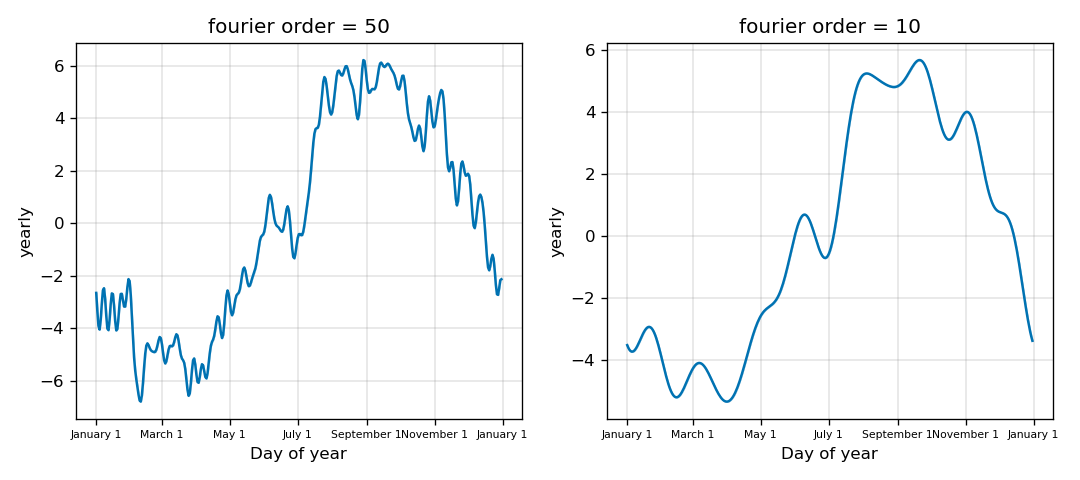

In [61]:
plt.rcParams.update({'figure.figsize':(9,4), 'figure.dpi':120,'xtick.labelsize' : 6.5})
fig, ax=plt.subplots(1,2)
plot_yearly(model1,ax=ax[0])
ax[0].set_title(f'fourier order = {F_order1}')

plot_yearly(model2, ax=ax[1])
ax[1].set_title(f'fourier order = {F_order2}')
plt.tight_layout()

plt.savefig('StockYearlySeasonalityComparison.png')

## Specifying Custom Seasonalities

10:29:50 - cmdstanpy - INFO - Chain [1] start processing
10:29:51 - cmdstanpy - INFO - Chain [1] done processing


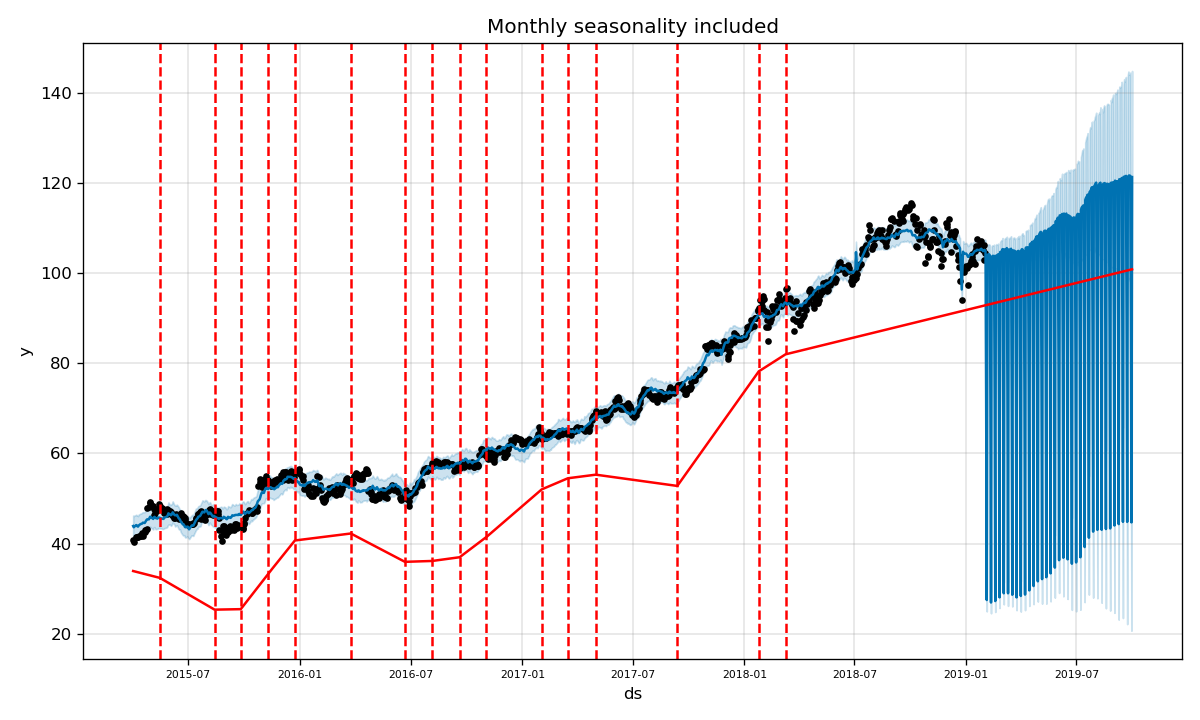

In [66]:
prophet_model=Prophet(daily_seasonality=False)

prophet_model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
prophet_model.fit(df_train)
future_df = prophet_model.make_future_dataframe(periods=test_size, freq = "D", include_history = True)
pred=prophet_model.predict(future_df)

fig=prophet_model.plot(pred)
a=add_changepoints_to_plot(fig.gca(),prophet_model,pred)
plt.title(f'Monthly seasonality included')
plt.tight_layout()

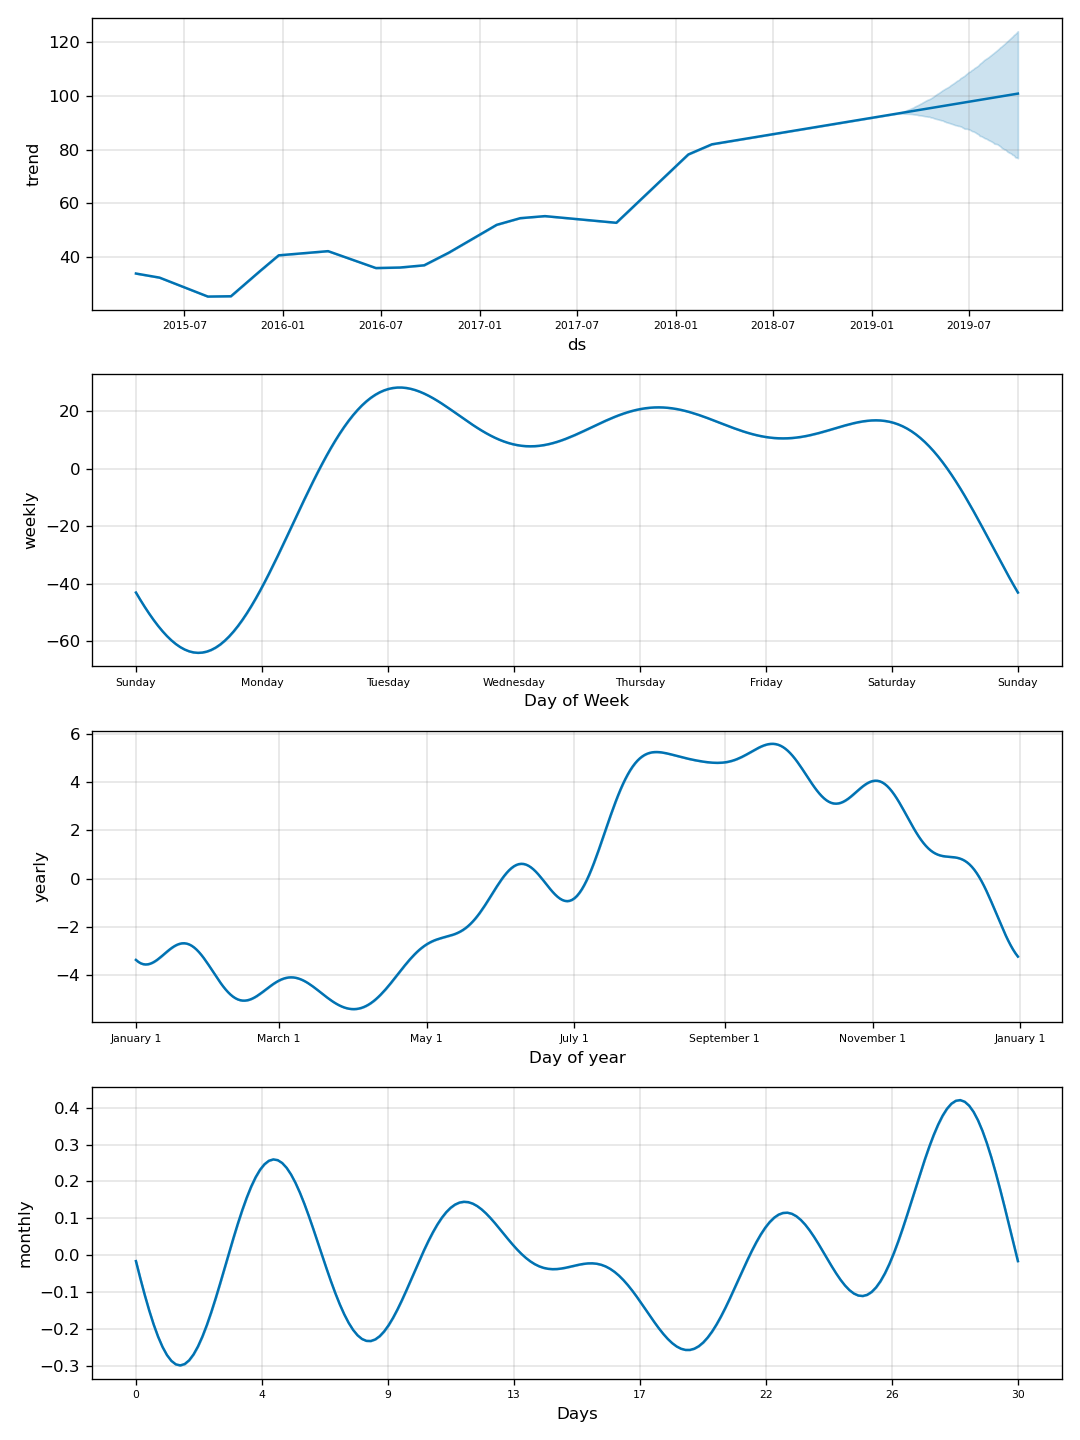

In [68]:
prophet_model.plot_components(pred);
plt.savefig('Stock_DailySeasonalityRemovedAndMmonthlySeasonalityIncluded.png')

## Drop Houre Column

In [18]:
from prophet import Prophet

from datetime import *

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [19]:
data_path="C:\\workspace\\Time serie_learning\\Microsoft_Stock.csv"
df=pd.read_csv(data_path)

In [20]:
df['Date']=df['Date'].apply(lambda x: x.replace('/','-'))

In [21]:
df['Date']=df['Date'].apply(lambda x: x.split(' '))

In [22]:
df['Date_Date']=df['Date'].apply(lambda x: datetime.strptime(x[0], '%m-%d-%Y').date())

In [23]:
df_for_prophet=df[['Date_Date','Close']].copy()

In [24]:
df_for_prophet.rename(columns={'Date_Date':'ds','Close':'y'},inplace='True')

In [25]:
train_portion=.8
df_80=df_for_prophet.iloc[:int(len(df_for_prophet)*train_portion)]
train_size=int(len(df_80['y'])*train_portion)
test_size=int(len(df_80['y'])-train_size)
df_train=df_80.iloc[:train_size]
df_test=df_80.iloc[train_size:]

In [28]:
df_train.head(10)

ds      y
0  2015-04-01  40.72
1  2015-04-02  40.29
2  2015-04-06  41.55
3  2015-04-07  41.53
4  2015-04-08  41.42
5  2015-04-09  41.48
6  2015-04-10  41.72
7  2015-04-13  41.76
8  2015-04-14  41.65
9  2015-04-15  42.26

In [26]:
model=Prophet()
model.fit(df_train)

14:39:15 - cmdstanpy - INFO - Chain [1] start processing
14:39:16 - cmdstanpy - INFO - Chain [1] done processing


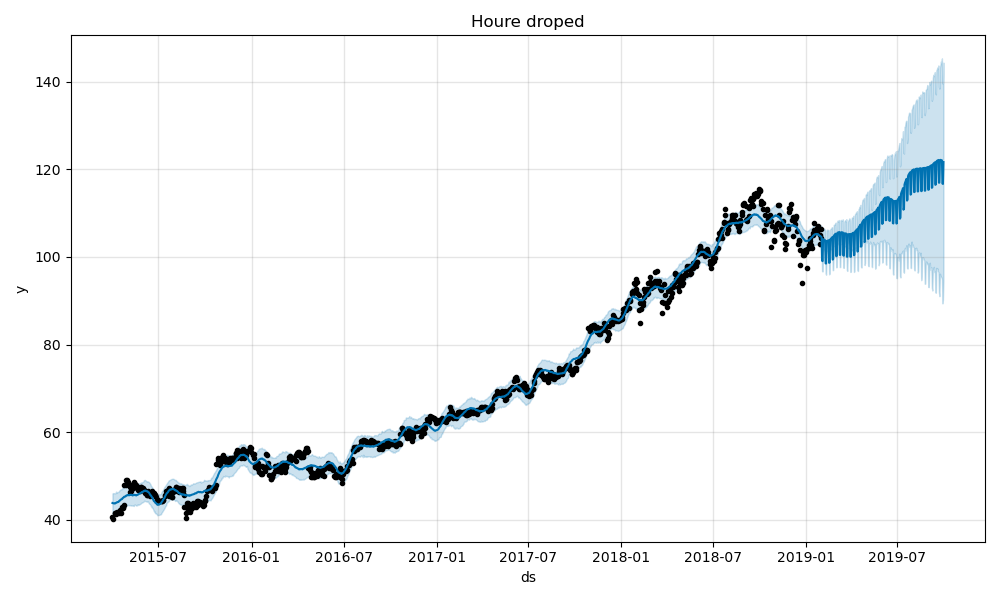

In [21]:
future_df=model.make_future_dataframe(periods=test_size,freq='D')
pred=model.predict(future_df)
model.plot(pred);
plt.title('Houre droped')
plt.tight_layout()
plt.savefig('Stock_HoureDroped.png')

## Data with regular gaps

In [22]:
X=[pd.Timestamp(x).dayofweek for x in list(df_for_prophet['ds'])]

In [23]:
set(X)

{0, 1, 2, 3, 4}

**As you can see there is no 5th and 6th day of the week in the dataframe**

In [29]:
from prophet import Prophet

from datetime import *

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [30]:
data_path="C:\\workspace\\Time serie_learning\\Microsoft_Stock.csv"
df=pd.read_csv(data_path)

In [31]:
df['Date']=df['Date'].apply(lambda x: x.replace('/','-'))

In [32]:
df['Date']=df['Date'].apply(lambda x: x.split(' '))

In [33]:
df['Date_Date']=df['Date'].apply(lambda x: datetime.strptime(x[0], '%m-%d-%Y').date())

In [34]:
df_for_prophet=df[['Date_Date','Close']].copy()

In [35]:
df_for_prophet.rename(columns={'Date_Date':'ds','Close':'y'},inplace='True')

In [36]:
train_portion=.8
df_80=df_for_prophet.iloc[:int(len(df_for_prophet)*train_portion)]
train_size=int(len(df_80['y'])*train_portion)
test_size=int(len(df_80['y'])-train_size)
df_train=df_80.iloc[:train_size]
df_test=df_80.iloc[train_size:]

In [37]:
model=Prophet()
model.fit(df_train)

14:46:24 - cmdstanpy - INFO - Chain [1] start processing
14:46:24 - cmdstanpy - INFO - Chain [1] done processing


In [38]:
future_df=model.make_future_dataframe(periods=test_size,freq='D')

In [39]:
set([pd.Timestamp(x).dayofweek for x in list(future_df['ds'])])

{0, 1, 2, 3, 4, 5, 6}

In [40]:
allowed_day=[5,6]

In [41]:
def cheque_allowed(x):
    if pd.Timestamp(x).dayofweek in allowed_day:
        return None 
    else:
        return 1

In [42]:
future_df['allowed']=future_df['ds'].apply(lambda x: cheque_allowed(x))

In [43]:
future_df['allowed'].isnull().sum()

70

In [44]:
future_df.dropna(inplace=True)

In [45]:
del future_df['allowed']

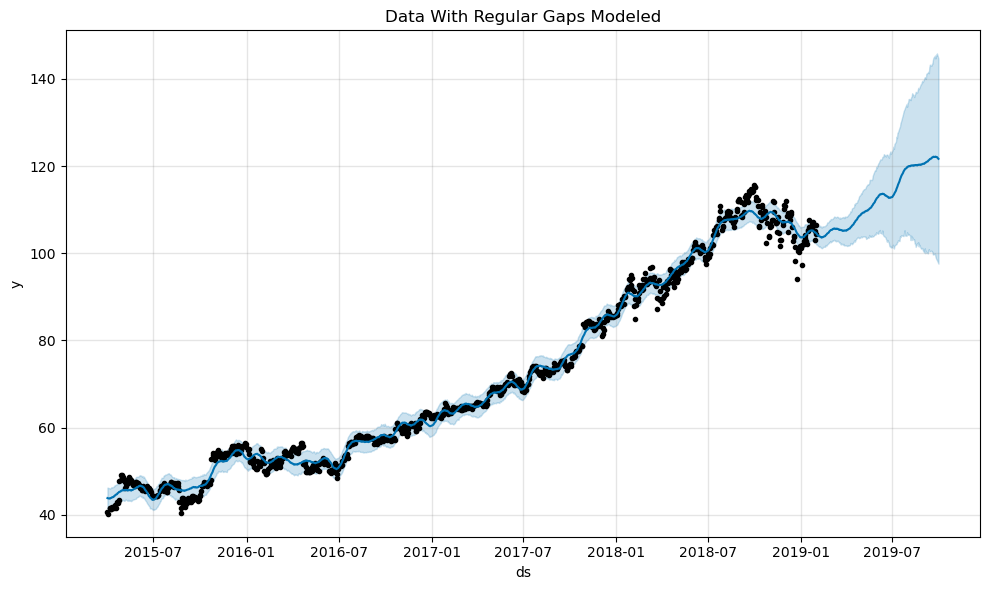

In [46]:
pred=model.predict(future_df)
model.plot(pred);
plt.title('Data With Regular Gaps Modeled')
plt.tight_layout()
plt.savefig('Stock_DataWithRegularGapsModeled.png')

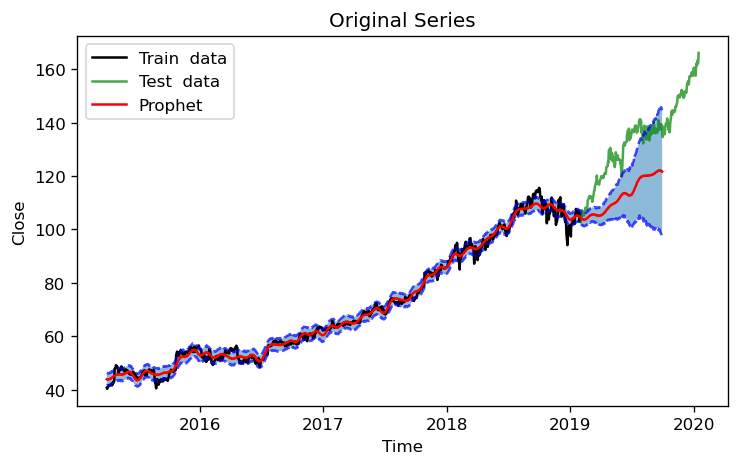

In [50]:
plt.rcParams.update({'figure.figsize':(7,4), 'figure.dpi':120});

plt.plot(df_train['ds'],df_train['y'],'k-',label='Train  data')
plt.plot(df_test['ds'],df_test['y'],'g-',label='Test  data',alpha=.7)
plt.plot(pred['ds'],pred['yhat'],'r-',label='Prophet')

plt.plot(pred['ds'],pred['yhat_lower'],'b--',alpha=.7)
plt.plot(pred['ds'],pred['yhat_upper'],'b--',alpha=.7)
plt.fill_between(pred['ds'],pred['yhat_lower'],pred['yhat_upper'],alpha=.5)

plt.xlabel('Time')
plt.ylabel('Close')
plt.legend(loc='upper left')
plt.title('Original Series')
plt.savefig('ProphetPrediction_withRegularGaps.png')
plt.show();

# Diagiagonostic 

## cross_validation

In [67]:
len(df_train)

966

In [68]:
from prophet.diagnostics import cross_validation

In [27]:
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')

  0%|          | 0/2 [00:00<?, ?it/s]

07:47:44 - cmdstanpy - INFO - Chain [1] start processing
07:47:44 - cmdstanpy - INFO - Chain [1] done processing
07:47:45 - cmdstanpy - INFO - Chain [1] start processing
07:47:45 - cmdstanpy - INFO - Chain [1] done processing


In [28]:
df_cv.head()

ds       yhat  yhat_lower  yhat_upper      y     cutoff
0 2017-08-07  74.179966   72.526799   75.738701  72.40 2017-08-04
1 2017-08-08  74.165549   72.507166   75.863996  72.79 2017-08-04
2 2017-08-09  74.192144   72.591655   75.836765  72.47 2017-08-04
3 2017-08-10  74.113334   72.424816   75.678783  71.41 2017-08-04
4 2017-08-11  74.150943   72.520286   75.890962  72.50 2017-08-04

In [29]:
df.head()

Date   Open   High    Low  Close    Volume   Date_Date
0  [4-1-2015, 16:00:00]  40.60  40.76  40.31  40.72  36865322  2015-04-01
1  [4-2-2015, 16:00:00]  40.66  40.74  40.12  40.29  37487476  2015-04-02
2  [4-6-2015, 16:00:00]  40.34  41.78  40.18  41.55  39223692  2015-04-06
3  [4-7-2015, 16:00:00]  41.61  41.91  41.31  41.53  28809375  2015-04-07
4  [4-8-2015, 16:00:00]  41.48  41.69  41.04  41.42  24753438  2015-04-08

## performance_metrics

In [30]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

horizon       mse      rmse       mae      mape     mdape     smape  \
0 37 days  3.046125  1.745315  1.309254  0.015851  0.012481  0.015722   
1 38 days  2.932953  1.712587  1.285693  0.015702  0.012481  0.015568   
2 39 days  2.987734  1.728506  1.313163  0.016085  0.012789  0.015957   
3 40 days  2.998664  1.731665  1.313751  0.015999  0.012481  0.015889   
4 41 days  2.771677  1.664835  1.268380  0.015444  0.012481  0.015359   

   coverage  
0      0.72  
1      0.74  
2      0.74  
3      0.74  
4      0.78

## plot_cross_validation_metric

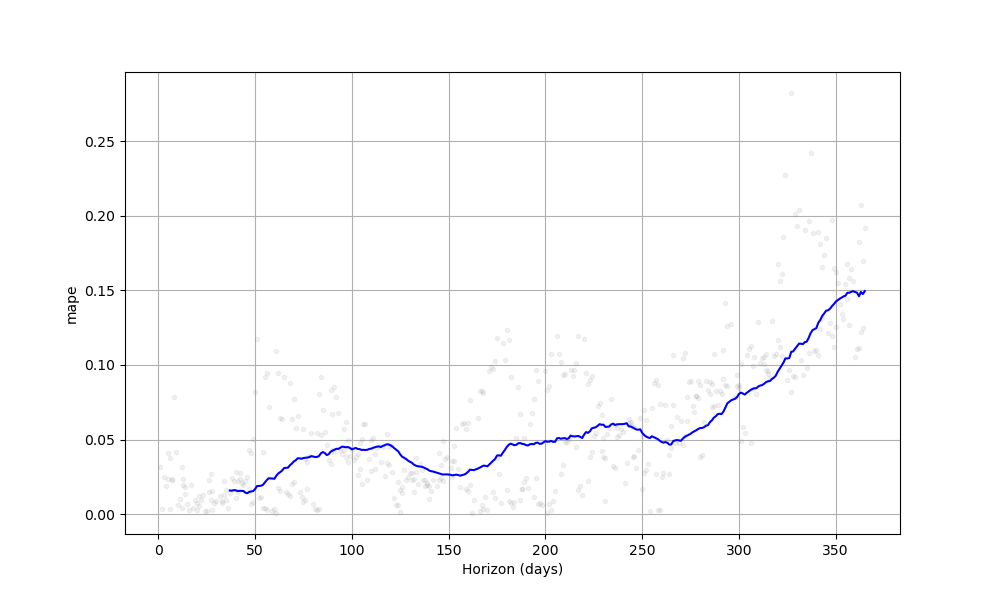

In [62]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

## Hyper parameter tuning

In [71]:
param_grid = {'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0]}
type(param_grid)

dict

In [73]:
import itertools
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
all_params

[{'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01},
 {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.1},
 {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 1.0},
 {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 10.0},
 {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.01},
 {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.1},
 {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 1.0},
 {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 10.0},
 {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.01},
 {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.1},
 {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 1.0},
 {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 10.0},
 {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.01},
 {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.1},
 {'changepoint_prior_scale': 0.5, 'seasonal

In [74]:
rmses = []
for params in all_params:
    model = Prophet(**params).fit(df_train)  # Fit model with given params
    df_cv = cross_validation(model, horizon='30 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

09:50:39 - cmdstanpy - INFO - Chain [1] start processing
09:50:39 - cmdstanpy - INFO - Chain [1] done processing
09:50:50 - cmdstanpy - INFO - Chain [1] start processing
09:50:50 - cmdstanpy - INFO - Chain [1] done processing
09:51:01 - cmdstanpy - INFO - Chain [1] start processing
09:51:01 - cmdstanpy - INFO - Chain [1] done processing
09:51:15 - cmdstanpy - INFO - Chain [1] start processing
09:51:15 - cmdstanpy - INFO - Chain [1] done processing
09:51:26 - cmdstanpy - INFO - Chain [1] start processing
09:51:26 - cmdstanpy - INFO - Chain [1] done processing
09:51:38 - cmdstanpy - INFO - Chain [1] start processing
09:51:38 - cmdstanpy - INFO - Chain [1] done processing
09:51:50 - cmdstanpy - INFO - Chain [1] start processing
09:51:50 - cmdstanpy - INFO - Chain [1] done processing
09:52:03 - cmdstanpy - INFO - Chain [1] start processing
09:52:03 - cmdstanpy - INFO - Chain [1] done processing
09:52:17 - cmdstanpy - INFO - Chain [1] start processing
09:52:17 - cmdstanpy - INFO - Chain [1]

In [113]:
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
tuning_results['x']=np.arange(0,len(tuning_results['rmse']))
tuning_results

changepoint_prior_scale  seasonality_prior_scale      rmse   x
0                     0.001                     0.01  7.691380   0
1                     0.001                     0.10  7.897649   1
2                     0.001                     1.00  7.795274   2
3                     0.001                    10.00  7.809057   3
4                     0.010                     0.01  5.177510   4
5                     0.010                     0.10  5.223209   5
6                     0.010                     1.00  5.236647   6
7                     0.010                    10.00  5.239898   7
8                     0.100                     0.01  3.524376   8
9                     0.100                     0.10  3.932640   9
10                    0.100                     1.00  3.949999  10
11                    0.100                    10.00  3.936274  11
12                    0.500                     0.01  3.162598  12
13                    0.500                     0.10  3.889279  13
14                    0.500                     1.00  4.115084  14
15                    0.500                    10.00  3.949498  15

In [111]:
import matplotlib.pyplot as plt
import seaborn as sn

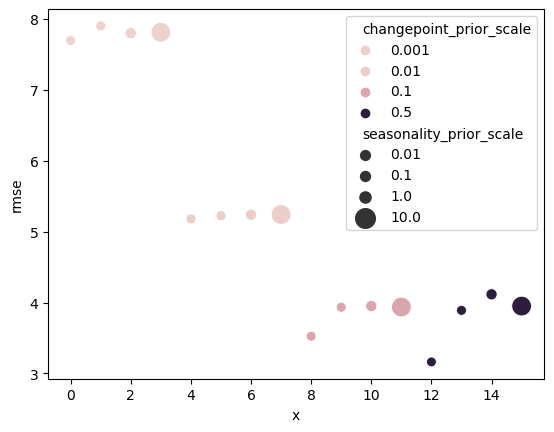

In [118]:
%matplotlib inline
sn.scatterplot(data=tuning_results,x='x',  y='rmse',hue='changepoint_prior_scale',size='seasonality_prior_scale',sizes=(50, 200))
plt.show()

Using matplotlib backend: module://ipympl.backend_nbagg


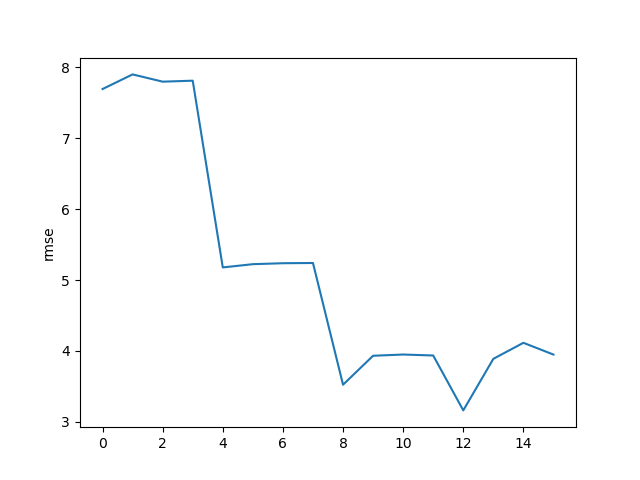

In [119]:
x=list(tuning_results['rmse'])
%matplotlib
plt.plot(x)
plt.ylabel('rmse')
plt.show()